In [1]:
# read the json files
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('./course_info_1224/') if isfile(join('./course_info_1224/', f))]

In [2]:
import pandas as pd
import json

def flatten_json(json):
    def process_value(keys, value, flattened):
        if isinstance(value, dict):
            for key in value.keys():
                process_value(keys + [key], value[key], flattened)
        elif isinstance(value, list):
            for idx, v in enumerate(value):
                process_value(keys + [str(idx)], v, flattened)
        else:
            flattened['__'.join(keys)] = value

    flattened = {}
    for key in json.keys():
        process_value([key], json[key], flattened)
    
    return flattened

In [3]:
# seting columns for dataframe

column_names = []

for i in range(len(onlyfiles)):
    with open('./course_info_1224/' + onlyfiles[i], 'r', encoding='utf-8') as f:
        data = json.load(f)
        flatten_json_data = flatten_json(data)
        column_names.extend(flatten_json_data.keys())

column_names = set(column_names)

flatten_json_data_df = pd.DataFrame(columns = column_names)
    
# use for loop to deal with the jsons and append to dataframe
for i in range(len(onlyfiles)):
    with open('./course_info_1224/' + onlyfiles[i], 'r', encoding='utf-8') as f:
        data = json.load(f)
        flatten_json_data = flatten_json(data)
        for key in flatten_json_data.keys():
            if key in column_names:
                flatten_json_data_df.loc[i, key] = flatten_json_data[key]

In [4]:
flatten_json_data_df

,group__uniquename,owner__metaDescription,lectures__3,owner__name,numRating,chargePlan___id,owner__description,video__videos__6__height,chargePlan__contracts__0___id,i18n__description,...,estimatedCourseStartTime,assignment,owner__privacies__isShowBookmarkedArticles,owner__states__bigMac2020__dailyGift__2020/9/05,owner__states__bigMac2020__dailyGift__2020/9/21,lectures__8,owner__states__bigMac2020__dailyGift__2020/9/09,price,skipIncubating,preOrderedPriceInMoneyPoint
0,career-skills,品好文化專注在數位新媒體發展，並持續在影像製作領域精進，無論是：\n影像製作 / 直播服務 ...,NaN,品好文化,9,625693dab3c597000695dc91,<p><b>品好文化專注在數位新媒體發展，<br />並持續在影像製作領域精進，無論是：<b...,NaN,62300860986d19013055229b,courses.61e7f78a6d9e6f00067549ab.release.descr...,...,2022-07-12T16:00:00.000Z,NaN,False,NaN,NaN,NaN,NaN,2490,False,1490
1,finance-and-investment,「課霸ClassBar」，提供您投資交易的課程與活動，包括股票、期貨、選擇權、外匯、與加密貨...,NaN,課霸Classbar,3,62300860986d19013055236e,NaN,NaN,62300860986d19013055229b,courses.607ceae6fa76bb60e8a556c8.release.descr...,...,2022-03-28T16:00:00.000Z,NaN,True,NaN,NaN,NaN,NaN,1500,False,999
2,language,CLN 致力於引領企業用外語佈局全球、教導學員以外語提升競爭力，讓客戶自在使用外語的同時，亦...,NaN,CLN｜Corporate Language Network,44,5f8f9ab71c1dab73932c1d26,<blockquote>關於 CLN</blockquote><p>CLN 長期深耕於外語服...,NaN,5f4dbe0906d0fd009b663539,courses.5f61ac35b3fbe95900c45cb0.release.descr...,...,2020-12-14T16:00:00.000Z,NaN,True,NaN,NaN,NaN,NaN,1490,False,990
3,lifestyle,1991年從修訂兒少福利法開始，歷經三十年的時間，兒福聯盟已經推展超過25種服務項目。與時俱...,NaN,兒福聯盟,94,612e185b020abb000694e20f,NaN,NaN,5f4dbe0906d0fd009b663539,courses.60c84de9eb75ca46e0c25e85.release.descr...,...,2021-11-07T16:00:00.000Z,NaN,True,NaN,NaN,NaN,NaN,0,False,0
4,design,九典聯合建築事務所BIM主任。成功大學研究所畢業x高考建築師及格。\n經歷六年以上BIM專案...,NaN,廖文瑜建築師 x DoubleR Studio,8,5d09cf120e6fcf0021211b4c,NaN,NaN,5cb7a42a23ffc8007e9f76d6,courses.5c8892e752c0ae0020e935c5.release.descr...,...,2019-09-30T16:00:00.000Z,NaN,True,NaN,NaN,NaN,NaN,4190,False,2490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,career-skills,我是筆名人渣文本的專欄作家周偉航，希望能把各種學術專業知識以最簡單實用的方式告訴大家~\n\...,NaN,Weihang Lidance Chou,42,5dafbdb72b35d400201eafbe,NaN,NaN,5cb7a42a23ffc8007e9f76d6,courses.5d80dde645639e00212d81a5.release.descr...,...,2019-12-21T16:00:00.000Z,NaN,True,NaN,NaN,NaN,NaN,499,False,399
911,marketing,Hi 我是Ann，從事行銷工作15年，跨足資訊科技、安防、媒體與非營利組織等不同產業領域，兼...,NaN,Ann Zuo,17,5cca6cca4557c300204754a6,NaN,NaN,5cb7a42a23ffc8007e9f76d6,courses.5a6ed74fe77921001e624cfb.release.descr...,...,2018-07-30T16:00:00.000Z,5a6ed74fe77921001e624cfc,True,NaN,NaN,NaN,NaN,1800,False,900
912,lifestyle,城邦出版集團「麥浩斯出版社」，經營生活風格相關書系近20年，旗下有《好吃》雜誌、「花草遊戲」...,NaN,myhouse,25,5d88431638076a002146c9d6,NaN,NaN,5cb7a42a23ffc8007e9f76d6,courses.5d5cae47e779aa0021517460.release.descr...,...,2019-12-22T16:00:00.000Z,NaN,True,NaN,NaN,NaN,NaN,1680,False,999
913,language,Podcast 主持人,NaN,Kevin 英文不難,11,629ec2f4560f3c0007dcafb4,"<h4>老師介紹</h4><p>你好，我是 Podcast 節目<a href=""https...",NaN,62300860986d19013055229b,courses.5d3694487f99a20021f83a5d.release.descr...,...,2019-12-17T16:00:00.000Z,NaN,False,NaN,NaN,NaN,NaN,2500,False,1890


In [5]:
flatten_json_data_df.to_csv('courses_data_original.csv', encoding = 'utf-8-sig', index = False)

# 尋找會用到的欄位

In [6]:
# 找文本資料欄位
for column in flatten_json_data_df.columns:
    print(column + ':')
    print(flatten_json_data_df.at[0, column])
    print('\n')

group__uniquename:
career-skills


owner__metaDescription:
品好文化專注在數位新媒體發展，並持續在影像製作領域精進，無論是：
影像製作 / 直播服務 / 線上課程錄製 / 自媒體經營
我們都希望能將您的才華，公 諸 於 世！


lectures__3:
nan


owner__name:
品好文化


numRating:
9


chargePlan___id:
625693dab3c597000695dc91


owner__description:
<p><b>品好文化專注在數位新媒體發展，<br />並持續在影像製作領域精進，無論是：<br />影像製作 / 直播服務 / 線上課程錄製 / 自媒體經營<br />我們都希望能將您的才華，公 諸 於 世！</b></p><p><br /><br /></p>


video__videos__6__height:
nan


chargePlan__contracts__0___id:
62300860986d19013055229b


i18n__description:
courses.61e7f78a6d9e6f00067549ab.release.description


i18n__targetGroup:
courses.61e7f78a6d9e6f00067549ab.release.targetGroup


chargePlan__contracts__0__paymentPlanTypes__0:
PP_ORGANIC


lectures__4:
nan


basePricingInfo__price:
2490


video__videos__5__height:
nan


owner__links__behance:
nan


video__videos__1__height:
540


squareCoverImage__height:
756


group__subGroup___id:
5c0a19001f7e290020b4c5be


chargePlan__status:
ACTIVE


owner__privacies__isShowBoughtKnowledgeCollections:
T

In [7]:
# 以下為有包含文本的欄位

# willLearn(將會學到)
# metaDescription(課程簡介)
# owner__interests(老師興趣)
# group__subGroup__title(子類別)
# targetGroup(授課目標)
# title(課程標題)
# group__title(類別)
# recommendedBackground(知識背景要求)
# owner__skills(老師技能)
# owner__metaDescription(老師介紹)
# requiredTools(需要工具)
# owner__description(老師介紹，有一堆 HTML TAG)
# description(綜合介紹，有一堆 HTML TAG)
# owner__name(老師名字)
# uniquename(名字 ID 代號，考慮要不要留)

# text_columns = ['willLearn', 'metaDescription', 'description', 'owner__interests', 'group__subGroup__title', 
#                 'targetGroup', 'title', 'group__title', 'recommendedBackground', 'owner__skills', 
#                 'owner__metaDescription', 'owner__description', 'requiredTools', 'owner__name']

In [8]:
# 以下為非文本(Boolean、Numeric)的欄位

# averageRating(平均星星數 -> 用來抓取某授課老師之前開課的星星數)
# numSoldTickets(售出票數(上課人數))
# preOrderedPrice(優惠價)
# status(狀態)
# basePricingInfo__price
# basePricingInfo__currencyCode(幣別)
# chargePlan__contracts__0__createdAt(契約開始)
# coverImage__url(課程封面X)
# preOrderedPriceInMoneyPoint(優惠價(以點數購買))
# basePricingInfo__preOrderedPrice
# latestCourseStartTime(近期課程開始時間X)
# draftRevisionUpdateTime
# estimatedCourseStartTime(預計開課時間)
# incubateTime(募資開始時間)
# successCriteria__numSoldTickets(開課門檻人數)
# estimatedCourseStartIntervalInDays
# totalVideoLengthInSeconds(影片總長度8562)
# publishTime(?)
# proposalStartTime
# proposalDueTime(募資截止時間)
# price(原價)
# priceInMoneyPoint(原價(以點數購買))
# estimatedCourseVideoLengthInMins(預計影片總長度分鐘125X)
# revisionReleaseTime
# createdAt
# video__videoLengthInSeconds(70)
# isReject(課程是否被否決)
# numRating(評論人數)
# incubationSchedule__preferredTime
# chargePlan__createdAt

# 刪除不必要欄位、保留必要欄位

In [9]:
necessary_columns = ['title',
                     'metaDescription',
                     'group__title',
                     'group__subGroup__title',
                     'targetGroup',
                     'recommendedBackground',
                     'willLearn',
                     'requiredTools',
                     'owner__name',
                     'uniquename',
                     'owner__metaDescription',
                     'owner__description',
                     'owner__interests',
                     'owner__skills',
                     'description',
                     'averageRating',
                     'numRating',
                     'numSoldTickets',
                     'price',
                     'priceInMoneyPoint',
                     'preOrderedPrice',
                     'preOrderedPriceInMoneyPoint',
                     'status',
                     'isReject',
                     'basePricingInfo__price',
                     'basePricingInfo__currencyCode',
                     'basePricingInfo__preOrderedPrice',
                     'chargePlan__contracts__0__createdAt',
                     'createdAt',
                     'incubationSchedule__preferredTime',
                     'incubateTime',
                     'proposalStartTime',
                     'proposalDueTime',
                     'latestCourseStartTime',
                     'publishTime',
                     'estimatedCourseStartTime',
                     'estimatedCourseStartIntervalInDays',
                     'chargePlan__createdAt',
                     'draftRevisionUpdateTime',
                     'revisionReleaseTime',
                     'successCriteria__numSoldTickets',
                     'totalVideoLengthInSeconds',
                     'estimatedCourseVideoLengthInMins',
                     'video__videoLengthInSeconds']

In [10]:
df_necessary = flatten_json_data_df[necessary_columns]

In [11]:
# 未刪除資料 (原始保留重要欄位的資料，重要 !!)
df_necessary

,title,metaDescription,group__title,group__subGroup__title,targetGroup,recommendedBackground,willLearn,requiredTools,owner__name,uniquename,...,publishTime,estimatedCourseStartTime,estimatedCourseStartIntervalInDays,chargePlan__createdAt,draftRevisionUpdateTime,revisionReleaseTime,successCriteria__numSoldTickets,totalVideoLengthInSeconds,estimatedCourseVideoLengthInMins,video__videoLengthInSeconds
0,直播銷貨很容易！第一次導購直播就上手,全民直播導購潮來臨，每個人都可以打開直播銷售賣貨，但卻不是人人都能成功。\n想要高人流、高轉...,職場技能,創業,★ 想增加斜槓技能的你\n★ 想了解導購直播的你\n★ 想搭上直播商機的你\n★ 想投入電商...,歡迎任何對直播有興趣、想了解直播導購產業，以及希望透過直播銷售賣貨的學員！\n\n不需擁有價...,\n1.\t最簡易開播創業的基礎直播設備｜給你最精準的基礎直播設備建議，不用花大錢買設備，一...,可上網的手機或是平板（可連結到直播平台）\n手機腳架（可選擇伸縮式的腳架，這樣站播或坐播都適...,品好文化,pincc-streaming,...,2022-07-13T04:15:55.759Z,2022-07-12T16:00:00.000Z,90,2022-04-13T09:11:54.389Z,2022-07-22T06:12:31.990Z,2022-07-13T04:15:55.732Z,30,7346,120,175
1,MultiCharts：期貨新手懶人投資術,本課程主要以期貨商品為主，並且使用 MultiCharts 來作教學，建立一套簡單實用的懶人...,投資理財,金融商品,本課程適合：\n1.適合無程式、投資經驗的初學者\n2.預算有限卻想要學習投資的學生或是小資...,相較於股票、基金等，期貨是相對風險較高的投資項目，對於還沒有接觸過期貨但想要使用的學員們，可...,本課程目標： \n一、認識期貨\n1.\t幫助新手了解期貨商品、與股票的差異\n2.\t認識...,1. 可以上網的電腦（Windows 系統）\n2. 紙筆或是任何可以幫助您紀錄的工具\n3...,課霸Classbar,classbar01,...,2022-03-29T04:00:16.763Z,2022-03-28T16:00:00.000Z,90,2022-03-15T03:30:40.895Z,2022-11-13T01:53:30.415Z,2022-04-07T05:17:18.728Z,30,38474,180,191
2,職場英文大補帖｜上班族的跨國會議必修課,近期新冠病毒疫情蔓延全球，跨境遠距會議的需求也隨之提升。在電腦或電話前 con-call 的...,語言,英文,- 工作上常需用英語進行遠距或實體會議的職場人。\n- 與外國人用英語溝通，常因為對方的口音...,需具備全民英檢中級或以上之英文能力,在跨國 con-call 會議前：\n\n- 了解 con-call 前需做好的準備，包括流...,筆記本和一支筆，或是任何可以幫助你思考、實作紀錄的用品皆可。,CLN｜Corporate Language Network,clnconcallenglish,...,2020-12-15T04:00:08.992Z,2020-12-14T16:00:00.000Z,55,2020-10-21T02:19:35.967Z,2022-12-12T04:16:21.083Z,2021-12-30T07:54:35.941Z,30,7423,120,125
3,我想離婚怎麼辦：兒福聯盟的離婚規劃課,當關係開始改變，婚姻狀態已經讓我十分糾結或痛苦時，我應該如何面對?\n兒福聯盟離婚親子維繫服...,生活品味,心靈成長與教育,1.感覺自己的婚姻遇到瓶頸的人。\n2.已經在離婚狀態中，想更知道如何處理的人。\n3.正在...,無程度限制。,1.可以學到如何好好的檢視自己的婚姻狀態。\n2.可以學到如何好好的離婚並能好好與孩子溝通及...,紙、筆等筆記工具，和一顆平和開放的心。,兒福聯盟,cwlf-divorce,...,2021-10-25T04:00:10.120Z,2021-11-07T16:00:00.000Z,67,2021-08-31T11:54:03.035Z,2022-11-03T02:35:52.495Z,2021-10-25T04:00:10.090Z,30,12646,180,161
4,BIM 實務即戰力！一堂課學會建築資訊模型,BIM 建築資訊模型課程，跟著建築師學習建築資訊模型的應用。課程包含 BIM 專案和 BMP...,設計,應用設計,1. 建築、室內、營造業界人士｜初學 BIM、沒有專案基礎、想增強在職場上的 BIM 即戰力...,對建築平面有基本了解，知道牆、門、窗在圖面上的表示方式。\n對建築從 0 到 1 的生產流程...,1. 可以用 Revit 執行建築專案建模。\n2. 能與業界接軌進行基本 BIM 專案執行...,Autodesk Revit 2019 - 免費 30 天試用版\n試用版下載：https:...,廖文瑜建築師 x DoubleR Studio,learnbim101,...,2019-09-30T04:00:28.098Z,2019-09-30T16:00:00.000Z,90,2019-06-19T05:58:42.845Z,2021-08-19T13:13:32.231Z,2020-05-19T08:28:44.893Z,30,39401,200,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,職場必備的批判思考力：論戰力篇,傳說中的論戰秘籍在眾人敲碗下終於轉化為影音課程！想學會表達自我，精準回應他人主張，這會是你絕...,職場技能,更多職場技能,1.對溝通能力缺乏自信。\n2.無法精準展示自身想法。\n3.難以回應自身無法認同的主張。\...,國民教育程度即可。曾上過「職場必備的批判思考力：基礎篇」也能有幫助哦！,強化溝通表達能力，包括判斷是否該發表意見，如何有效傳達自身想法，針對他人主張該如何快速反應，...,本課程無特定工具需求。,Weihang Lidance Chou,criticalcommuni,...,2019-12-13T09:28:11.655Z,2019-12-21T16:00:00.000Z,60,2019-10-23T02:40:55.065Z,2022-01-05T01:32:39.811Z,2019-12-13T09:28:11.031Z,30,4444,60,107
911,【影音行銷】將名單變成訂單的最佳解答,利用殺手級的影音內容矩陣秘技，規劃出一個策略型的影音計劃，提升行銷漏斗中的轉換率，將名單轉換...,行銷,數位行銷,如果把行銷專業度分成四年級的話，一到三年級的行銷人皆適合這堂課；還有小型企業主。\n\n一年...,在這個市場變化快速、使用者慣性不斷改變的時代，有時過多的知識背景或經驗反而是一種枷鎖。所以，...,1.\t認識數位行銷的全球趨勢與其核心價值: 自媒體行銷、內容行銷與影音行銷的協作\n2.\...,同學不需要準備任何工具，只要幫你自己準備好一杯咖啡靜下心來聽課，就可以獲得老師超過10年經驗...,Ann Zuo,videomarketing2018,...,2018-07-24T04:03:23.694Z,2018-07-30T16:00:00.000Z,90,2019-05-02T04:06:34.809Z,2020-08-02T14:16:27.377Z,2020-08-02T14:32:30.113Z,30,4887,60,134
912,創作你的療癒香草茶！百種風味搭配邏輯,自製香草茶課程，認識 33 種常見香草的風味特性與搭配邏輯，教你香草茶的沖泡技巧與飲用時機，...,生活品味,更多生活品味,1. 想療癒身心，替自己泡杯專屬香草茶的人\n2. 熱愛香草植物，卻不懂怎麼搭配的新手\n3...,不需任何背景知識，只要喜歡喝茶、想要理解香草風味即可,＊懂得 33 種常見香草的風味特性與搭配邏輯，掌握至少 100 種以上的香草組合配方。\n＊...,一個可以泡香草茶的壺與杯,myhouse,myhouse1,...,2019-12-23T04:00:50.347Z,2019-12-22T16:00:00.000Z,90,2019-09-23T03:59:18.946Z,2020-05-18T08:16:34.032Z,2020-05-18T08:16:35.592Z,50,5248,100,155
913,托福口說拿分 4 原則｜發音、表達一把罩,【你是否遇到這些問題？】\n(1) 看到題目腦中空白\n(2) 腦中有想法，講出來卻不自然\...,語言,英文

In [12]:
# 轉換時間表達形式
from datetime import datetime
import pytz
from datetime import datetime, date, time, timezone

columns_about_time = ['chargePlan__contracts__0__createdAt',
                     'createdAt',
                     'incubationSchedule__preferredTime',
                     'incubateTime',
                     'proposalStartTime',
                     'proposalDueTime',
                     'latestCourseStartTime',
                     'publishTime',
                     'estimatedCourseStartTime',
                     'chargePlan__createdAt',
                     'draftRevisionUpdateTime',
                     'revisionReleaseTime']

df_necessary_1 = df_necessary.copy()

for i in range(len(df_necessary_1)):
    for column in columns_about_time:
        if type(df_necessary_1.at[i, column]) is not float:
            d = datetime.fromisoformat(df_necessary_1.at[i, column][:-1]).astimezone(timezone.utc)
            df_necessary_1.at[i, column] = d.strftime('%Y-%m-%d')
        
df_necessary_1

,title,metaDescription,group__title,group__subGroup__title,targetGroup,recommendedBackground,willLearn,requiredTools,owner__name,uniquename,...,publishTime,estimatedCourseStartTime,estimatedCourseStartIntervalInDays,chargePlan__createdAt,draftRevisionUpdateTime,revisionReleaseTime,successCriteria__numSoldTickets,totalVideoLengthInSeconds,estimatedCourseVideoLengthInMins,video__videoLengthInSeconds
0,直播銷貨很容易！第一次導購直播就上手,全民直播導購潮來臨，每個人都可以打開直播銷售賣貨，但卻不是人人都能成功。\n想要高人流、高轉...,職場技能,創業,★ 想增加斜槓技能的你\n★ 想了解導購直播的你\n★ 想搭上直播商機的你\n★ 想投入電商...,歡迎任何對直播有興趣、想了解直播導購產業，以及希望透過直播銷售賣貨的學員！\n\n不需擁有價...,\n1.\t最簡易開播創業的基礎直播設備｜給你最精準的基礎直播設備建議，不用花大錢買設備，一...,可上網的手機或是平板（可連結到直播平台）\n手機腳架（可選擇伸縮式的腳架，這樣站播或坐播都適...,品好文化,pincc-streaming,...,2022-07-12,2022-07-12,90,2022-04-13,2022-07-21,2022-07-12,30,7346,120,175
1,MultiCharts：期貨新手懶人投資術,本課程主要以期貨商品為主，並且使用 MultiCharts 來作教學，建立一套簡單實用的懶人...,投資理財,金融商品,本課程適合：\n1.適合無程式、投資經驗的初學者\n2.預算有限卻想要學習投資的學生或是小資...,相較於股票、基金等，期貨是相對風險較高的投資項目，對於還沒有接觸過期貨但想要使用的學員們，可...,本課程目標： \n一、認識期貨\n1.\t幫助新手了解期貨商品、與股票的差異\n2.\t認識...,1. 可以上網的電腦（Windows 系統）\n2. 紙筆或是任何可以幫助您紀錄的工具\n3...,課霸Classbar,classbar01,...,2022-03-28,2022-03-28,90,2022-03-14,2022-11-12,2022-04-06,30,38474,180,191
2,職場英文大補帖｜上班族的跨國會議必修課,近期新冠病毒疫情蔓延全球，跨境遠距會議的需求也隨之提升。在電腦或電話前 con-call 的...,語言,英文,- 工作上常需用英語進行遠距或實體會議的職場人。\n- 與外國人用英語溝通，常因為對方的口音...,需具備全民英檢中級或以上之英文能力,在跨國 con-call 會議前：\n\n- 了解 con-call 前需做好的準備，包括流...,筆記本和一支筆，或是任何可以幫助你思考、實作紀錄的用品皆可。,CLN｜Corporate Language Network,clnconcallenglish,...,2020-12-14,2020-12-14,55,2020-10-20,2022-12-11,2021-12-29,30,7423,120,125
3,我想離婚怎麼辦：兒福聯盟的離婚規劃課,當關係開始改變，婚姻狀態已經讓我十分糾結或痛苦時，我應該如何面對?\n兒福聯盟離婚親子維繫服...,生活品味,心靈成長與教育,1.感覺自己的婚姻遇到瓶頸的人。\n2.已經在離婚狀態中，想更知道如何處理的人。\n3.正在...,無程度限制。,1.可以學到如何好好的檢視自己的婚姻狀態。\n2.可以學到如何好好的離婚並能好好與孩子溝通及...,紙、筆等筆記工具，和一顆平和開放的心。,兒福聯盟,cwlf-divorce,...,2021-10-24,2021-11-07,67,2021-08-31,2022-11-02,2021-10-24,30,12646,180,161
4,BIM 實務即戰力！一堂課學會建築資訊模型,BIM 建築資訊模型課程，跟著建築師學習建築資訊模型的應用。課程包含 BIM 專案和 BMP...,設計,應用設計,1. 建築、室內、營造業界人士｜初學 BIM、沒有專案基礎、想增強在職場上的 BIM 即戰力...,對建築平面有基本了解，知道牆、門、窗在圖面上的表示方式。\n對建築從 0 到 1 的生產流程...,1. 可以用 Revit 執行建築專案建模。\n2. 能與業界接軌進行基本 BIM 專案執行...,Autodesk Revit 2019 - 免費 30 天試用版\n試用版下載：https:...,廖文瑜建築師 x DoubleR Studio,learnbim101,...,2019-09-29,2019-09-30,90,2019-06-18,2021-08-19,2020-05-19,30,39401,200,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,職場必備的批判思考力：論戰力篇,傳說中的論戰秘籍在眾人敲碗下終於轉化為影音課程！想學會表達自我，精準回應他人主張，這會是你絕...,職場技能,更多職場技能,1.對溝通能力缺乏自信。\n2.無法精準展示自身想法。\n3.難以回應自身無法認同的主張。\...,國民教育程度即可。曾上過「職場必備的批判思考力：基礎篇」也能有幫助哦！,強化溝通表達能力，包括判斷是否該發表意見，如何有效傳達自身想法，針對他人主張該如何快速反應，...,本課程無特定工具需求。,Weihang Lidance Chou,criticalcommuni,...,2019-12-13,2019-12-21,60,2019-10-22,2022-01-04,2019-12-13,30,4444,60,107
911,【影音行銷】將名單變成訂單的最佳解答,利用殺手級的影音內容矩陣秘技，規劃出一個策略型的影音計劃，提升行銷漏斗中的轉換率，將名單轉換...,行銷,數位行銷,如果把行銷專業度分成四年級的話，一到三年級的行銷人皆適合這堂課；還有小型企業主。\n\n一年...,在這個市場變化快速、使用者慣性不斷改變的時代，有時過多的知識背景或經驗反而是一種枷鎖。所以，...,1.\t認識數位行銷的全球趨勢與其核心價值: 自媒體行銷、內容行銷與影音行銷的協作\n2.\...,同學不需要準備任何工具，只要幫你自己準備好一杯咖啡靜下心來聽課，就可以獲得老師超過10年經驗...,Ann Zuo,videomarketing2018,...,2018-07-23,2018-07-30,90,2019-05-01,2020-08-02,2020-08-02,30,4887,60,134
912,創作你的療癒香草茶！百種風味搭配邏輯,自製香草茶課程，認識 33 種常見香草的風味特性與搭配邏輯，教你香草茶的沖泡技巧與飲用時機，...,生活品味,更多生活品味,1. 想療癒身心，替自己泡杯專屬香草茶的人\n2. 熱愛香草植物，卻不懂怎麼搭配的新手\n3...,不需任何背景知識，只要喜歡喝茶、想要理解香草風味即可,＊懂得 33 種常見香草的風味特性與搭配邏輯，掌握至少 100 種以上的香草組合配方。\n＊...,一個可以泡香草茶的壺與杯,myhouse,myhouse1,...,2019-12-22,2019-12-22,90,2019-09-22,2020-05-18,2020-05-18,50,5248,100,155
913,托福口說拿分 4 原則｜發音、表達一把罩,【你是否遇到這些問題？】\n(1) 看到題目腦中空白\n(2) 腦中有想法，講出來卻不自然\...,語言,英文,想增加托福口說分數的人,(1) 全民英檢中級或以上，或多益 650 以上 \n(2) 基礎英文口說能力 \n(3) ...,(1) 學生英文更流利、自然。理解考試該如何運用停頓、配速讓回答內容流暢。\n(2) 發音變...,紙、筆,Kevin 英文不難,english-great-easy,...,2019-12-17,2019-12-17,90,2022-06-06,2020-02-21,2019-12-17,30,13910,240,161


# 初步篩選資料

In [13]:
# 先找哪一欄位有比較少的 2020 年以前開課課程

candidate_columns = ['latestCourseStartTime',
                     'publishTime',
                     'estimatedCourseStartTime']
counts = {'latestCourseStartTime':0, 'publishTime':0, 'estimatedCourseStartTime':0}

for i in range(len(df_necessary_1)):
    for column in candidate_columns:
        if type(df_necessary_1.at[i, column]) is not float:
            d = datetime.strptime(df_necessary_1.at[i, column], '%Y-%m-%d')
            if d.year <= 2019:
                counts[column] = counts[column] + 1
print(counts)

{'latestCourseStartTime': 335, 'publishTime': 337, 'estimatedCourseStartTime': 336}


In [14]:
# 刪除 2020 年以前開課的課程、保留 2020 年以後開課的課程
course_IDs = []
for i in range(len(df_necessary_1)):
    if type(df_necessary_1.at[i, 'latestCourseStartTime']) is not float:
        d = datetime.strptime(df_necessary_1.at[i, 'latestCourseStartTime'], '%Y-%m-%d')
        if d.year >= 2020:
            course_IDs.append(i)
df_necessary_2 = df_necessary_1.iloc[course_IDs]

In [15]:
df_necessary_2

,title,metaDescription,group__title,group__subGroup__title,targetGroup,recommendedBackground,willLearn,requiredTools,owner__name,uniquename,...,publishTime,estimatedCourseStartTime,estimatedCourseStartIntervalInDays,chargePlan__createdAt,draftRevisionUpdateTime,revisionReleaseTime,successCriteria__numSoldTickets,totalVideoLengthInSeconds,estimatedCourseVideoLengthInMins,video__videoLengthInSeconds
0,直播銷貨很容易！第一次導購直播就上手,全民直播導購潮來臨，每個人都可以打開直播銷售賣貨，但卻不是人人都能成功。\n想要高人流、高轉...,職場技能,創業,★ 想增加斜槓技能的你\n★ 想了解導購直播的你\n★ 想搭上直播商機的你\n★ 想投入電商...,歡迎任何對直播有興趣、想了解直播導購產業，以及希望透過直播銷售賣貨的學員！\n\n不需擁有價...,\n1.\t最簡易開播創業的基礎直播設備｜給你最精準的基礎直播設備建議，不用花大錢買設備，一...,可上網的手機或是平板（可連結到直播平台）\n手機腳架（可選擇伸縮式的腳架，這樣站播或坐播都適...,品好文化,pincc-streaming,...,2022-07-12,2022-07-12,90,2022-04-13,2022-07-21,2022-07-12,30,7346,120,175
1,MultiCharts：期貨新手懶人投資術,本課程主要以期貨商品為主，並且使用 MultiCharts 來作教學，建立一套簡單實用的懶人...,投資理財,金融商品,本課程適合：\n1.適合無程式、投資經驗的初學者\n2.預算有限卻想要學習投資的學生或是小資...,相較於股票、基金等，期貨是相對風險較高的投資項目，對於還沒有接觸過期貨但想要使用的學員們，可...,本課程目標： \n一、認識期貨\n1.\t幫助新手了解期貨商品、與股票的差異\n2.\t認識...,1. 可以上網的電腦（Windows 系統）\n2. 紙筆或是任何可以幫助您紀錄的工具\n3...,課霸Classbar,classbar01,...,2022-03-28,2022-03-28,90,2022-03-14,2022-11-12,2022-04-06,30,38474,180,191
2,職場英文大補帖｜上班族的跨國會議必修課,近期新冠病毒疫情蔓延全球，跨境遠距會議的需求也隨之提升。在電腦或電話前 con-call 的...,語言,英文,- 工作上常需用英語進行遠距或實體會議的職場人。\n- 與外國人用英語溝通，常因為對方的口音...,需具備全民英檢中級或以上之英文能力,在跨國 con-call 會議前：\n\n- 了解 con-call 前需做好的準備，包括流...,筆記本和一支筆，或是任何可以幫助你思考、實作紀錄的用品皆可。,CLN｜Corporate Language Network,clnconcallenglish,...,2020-12-14,2020-12-14,55,2020-10-20,2022-12-11,2021-12-29,30,7423,120,125
3,我想離婚怎麼辦：兒福聯盟的離婚規劃課,當關係開始改變，婚姻狀態已經讓我十分糾結或痛苦時，我應該如何面對?\n兒福聯盟離婚親子維繫服...,生活品味,心靈成長與教育,1.感覺自己的婚姻遇到瓶頸的人。\n2.已經在離婚狀態中，想更知道如何處理的人。\n3.正在...,無程度限制。,1.可以學到如何好好的檢視自己的婚姻狀態。\n2.可以學到如何好好的離婚並能好好與孩子溝通及...,紙、筆等筆記工具，和一顆平和開放的心。,兒福聯盟,cwlf-divorce,...,2021-10-24,2021-11-07,67,2021-08-31,2022-11-02,2021-10-24,30,12646,180,161
6,李昆霖品牌實戰十講：感召人心的品牌方程式,「征服法國的台灣面膜」提提研創辦人李昆霖，公開分享品牌策略全局，帶你將品牌思維實踐在「品牌定...,行銷,更多行銷,只要你有想要推廣的產品、內容或理念，無論屬於哪個產業，這堂課都能幫助你打造感召人心的品牌。,無需特殊背景知識,在自己的產品、內容、工作上運用品牌策略，跳脫削價競爭、提升品牌價值。\n用品牌思維規劃「市場...,可觀看線上課程影片的電腦、平板或手機,李昆霖,humblejohnlee,...,2022-01-11,2022-01-11,90,2021-10-11,2022-02-22,2022-01-23,30,8733,180,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,心智繪圖思考法：繪製你的思維地圖,在每一個人的成長歲月裡，選擇很重要，來這裡跟老師一起學會一種有創意的思考方式。\n我會用一個...,生活品味,心靈成長與教育,哪些人適合這堂課？\n1. 沒有學過“ 心智繪圖“ 的初學者，想透過訓練自己的“ 思考方式“...,心智繪圖初學者，喜歡動腦或者喜歡學習動腦的人，並不需要特殊的背景知識，只需要準備一顆快樂的好奇心。,課後，你將學會 :\n1. 學會歸納整理的方法，大量閱讀的時候，很快就能找到重點，讓你資料 ...,上課前請準備\n1. 彩色筆 ( 8~12色，彩色鉛筆或水性彩色筆都可以 )。\n2. 白紙...,mindpicture,mindpicture-workshop,...,2020-09-27,2020-09-27,90,2019-06-24,2020-10-18,2020-09-27,30,11908,180,152
906,April 的夢幻色盤：油性粉彩的療癒配方,在忙碌、繁雜的生活裡，總是有需要呼吸的時候，畫畫，是釋放的好方法之一。\n一片風景，一朵花卉...,藝術,繪畫與插畫,想瞭解油性粉彩的你\n喜歡油畫質感，但是覺得油畫入門門檻太高的你\n想透過畫畫療癒自己、打造...,繪畫初心者友善\n,油性粉彩的技法與知識\n學會打造柔美配色的技巧\n獲得利用畫作妝點生活的靈感,必備工具：油性粉彩、鉛筆、軟橡皮、橡皮擦、棉花棒、紙材\n可以加購的進階工具：刮刀、油性色鉛...,April 小簡,apriloilpastel,...,2022-04-17,2022-04-17,90,2022-03-14,2022-06-01,2022-06-01,40,13280,150,173
909,產品數據分析 - 打造網路產品的決策引擎,從擁有億級使用者的跨國企業，到成長強勁的新創團隊，都必須透過使用者資料分析，改善產品與商業決...,職場技能,產品設計,任何對網路產品有興趣，想更了解「產品」與「使用者經營」策略，並學習數據分析方法的朋友，都非常...,只要你樂於思考，對「網路產品」與「數據分析」有熱忱，都非常適合這門課程。此外，這門課程不會使...,- 釐清與定義產品問題，進而辨認有策略意義的相關資料，提升產品決策的品質\n- 根據產品的商...,對於產品與數據分析的熱情、紙筆等幫助你思考與筆記的工具,大維&辰禧,productanalytics,...,2020-10-25,2020-10-25,90,2020-07-27,2022-11-15,2022-01-18,30,45272,600,160
910,職場必備的批判思考力：論戰力篇,傳說中的論戰秘籍在眾人敲碗下終於轉化為影音課程！想學會表達自我，精準回應他人主張，這會是你絕...,職場技能,更多職場技能,1.對溝通能力缺乏自信。\n2.無法精準展示自身想法。\n3.難以回應自身無法認同的主張。\...,國民教育程度即可。曾上過「職場必備的批判思考力：基礎篇」也能有幫助哦！,強化溝通表達能力，包括判斷是否該發表意見，如何有效傳達自身想法，針對他人主張該如何快速反應，...,本課程無特定工具需求。,Weihang Lidance Chou,criticalcommuni,...,2019-12-13,2019-12-21,60,2019-10-22,2022-01-04,2019-12-13,30,4444,60,107


In [65]:
# df_necessary_2.to_csv('time_changed_after2020.csv', encoding = 'utf-8-sig', index = False)

# 讀取人為補值後的資料

In [16]:
df_filled_by_hand = pd.read_csv('data_filled_by_hand.csv')

# 欄位處理

In [155]:
# 不會用的欄位
# not_use_columns = ['isReject', 'basePricingInfo__price', 'basePricingInfo__currencyCode', 'basePricingInfo__preOrderedPrice']

In [17]:
# 新增 description_without_tag (可以用來計算課程介紹長度)
import re
def remove_tag(text):
    # 移除 url
    results = re.compile(r'http://[a-zA-Z0-9.?/&=:]*',re.S)
    results_no_url = results.sub('', text)
    results = re.compile(r'https://[a-zA-Z0-9.?/&=:]*',re.S)
    results_no_url = results.sub('', results_no_url)
    
    # 移除圖片連結、超連結
    image_tag = re.compile(r'<img.*?/>',re.S)
    results_no_img = image_tag.sub('',results_no_url)
    link = re.compile(r'<a.*?>',re.S)
    results_no_link = link.sub('',results_no_img)
    
    # 移除 html tag
    pattern = re.compile(r'<[^>]+>',re.S)
    results_no_htmltag = pattern.sub('', results_no_link)
    
    return results_no_htmltag

df_description_without_tag_added = df_filled_by_hand.copy()
columns = list(df_description_without_tag_added.columns)
# print(columns)
description_without_tag_position = columns.index('description') + 1
df_description_without_tag_added.insert(description_without_tag_position, 'description_without_tag', df_description_without_tag_added['description'].apply(remove_tag).values, True)

In [18]:
df_description_without_tag_added['description_without_tag']

0      一、理財教程眾多，缺乏重點整理筆記在網路上搜尋某個投資理財問題，跳出的是各家銀行琳瑯滿目的廣...
1      解讀數據指標是一門專業，營運數據分析是一個覆蓋範圍很廣的領域，絕非單一的工具、單一思維能夠完...
2      你知道為什麼要經營短影音嗎？與藝人陳勢安、A-Lin 合作短影音經營自媒體，你一定遇過這些問...
3      Hahow 首場趨勢論壇登場！數位轉型下，知識劃破時空的隔閡，當世上問題已不再只有單一解答，...
4      12/7 - 12/28 限定揪團優惠，快邀請朋友一起來上課吧！五人團購方案 每人只要 $2...
                             ...                        
470    首先，一起做個小測驗，請首先，一起做個小測驗，請問以下有幾項符合你的情形呢？A、書看了好幾本...
471    12/7 - 12/28 限定揪團優惠，快邀請朋友一起來上課吧！五人團購方案 每人只要 $2...
472    練習的關鍵不在於照本宣科，了解為何而練比較重要練習不需要太複雜，而是針對問題去精準練習才會有...
473    行銷工具每一年都在變，到底要選哪一種？為何別人小預算可以極大化，而我們的卻沒效果？我不會做行...
474    為什麼你必須具備台式料理的技能？『身為台灣人，傳承台灣文化傳承台灣味，你也有相同的使命』三十...
Name: description_without_tag, Length: 475, dtype: object

# 再次篩選資料

In [19]:
# 移除募資中

df_no_incubating = df_description_without_tag_added[df_description_without_tag_added['status'] != 'INCUBATING']

In [20]:
# 移除募資成功尚未開課

df_no_unpublished = df_no_incubating.copy()
# df_no_unpublished = df_no_unpublished[df_no_unpublished['status'] != 'SUCCESS']

In [21]:
# 刪除 0 元課程

df_no_free_courses = df_no_unpublished[df_no_unpublished['price'] > 0.]

In [22]:
# 保留 2020 ~ 2022 開課的資料
course_IDs = []
courses = df_no_free_courses.index.tolist()
for i in courses:
    if type(df_no_free_courses.at[i, 'publishTime']) is not float:
        d = datetime.strptime(df_no_free_courses.at[i, 'publishTime'], '%Y-%m-%d')
        if d.year >= 2020 and d.year < 2023:
            course_IDs.append(i)
df_2020_2022 = df_no_free_courses.loc[course_IDs]

In [23]:
# 移除至 12/24 仍有大幅變動的課程

df_filtered = df_2020_2022.copy()
course_title = ['兒福聯盟-爸媽必修課:培養孩子反霸凌超能力',
                '王梓沅的 3D 英文筆記術：打造最強「說」「寫」英語資料庫',
                '建立個人品牌視覺：諾米帶你上手風格再造',
                '創作坊精華：入手專家心法，讓品牌創意變身',
                '遠距工作力：溝通協作到自我管理',
                '動態設計思維，柏尹帶你培養品牌動畫鑑賞力',
                'Seagate 講堂 | 平面設計師顏伯駿教你做履歷',
                '王梓沅的英文思維模板術：母語人士的脈絡、習慣、情境表達',
                'Notion 實戰課程：打造專屬數位工作術',
                '我想離婚怎麼辦：兒福聯盟的離婚規劃課',
                'Excel 新手入門必修課：從 0 開始',
                '產品設計實戰：用Figma打造絕佳UI/UX',
                'Seagate 講堂 | 影像後製再現影像教你做履歷',
                '人人必修動力鏈-強化身體弱連結',
                'RyuuuTV看動漫看日劇，零到N4道地說日文',
                'Seagate 講堂 | 動態導演林呈軒教你做履歷',
                '減法攝影，感官加乘：逐格收藏觀景窗裡的世界']
# df_filtered

# 特徵工程：欄位所衍生新特徵

In [24]:
# 新增課程介紹中圖片數量 (根據 description 欄位)

df_pictureNum_added =  df_filtered.copy()

def countpicturenum(text):
    return text.count('<img')

columns = list(df_pictureNum_added.columns)
pictureNum_position = columns.index('description') + 1
df_pictureNum_added.insert(pictureNum_position, 'pictureNum', df_pictureNum_added['description'].apply(countpicturenum).values, True)


In [25]:
# 新增課程介紹長度 (根據 description_without_tag 欄位)

df_lengthOfDescription_added =  df_pictureNum_added.copy()

def countlength(text):
    return len(text)

columns = list(df_lengthOfDescription_added.columns)
lengthOfDescription_position = columns.index('description_without_tag') + 1
df_lengthOfDescription_added.insert(lengthOfDescription_position, 'lengthOfDescription', df_lengthOfDescription_added['description_without_tag'].apply(countlength).values, True)


In [26]:
df_lengthOfDescription_added[['pictureNum', 'lengthOfDescription']]

,pictureNum,lengthOfDescription
0,19,3256
1,7,3292
2,15,2147
4,24,5640
5,16,5018
...,...,...
470,24,5359
471,25,3151
472,19,9105
473,14,2447


In [27]:
# 新增子類別課程數量 (根據 group__subGroup__title 欄位)

df_subtitleCourseNum_added = df_lengthOfDescription_added.copy()
courses = df_subtitleCourseNum_added.index.tolist()

results = []
for i in courses:
    if type(df_subtitleCourseNum_added.at[i, 'incubateTime']) is not float:
        this = datetime.strptime(df_no_free_courses.at[i, 'incubateTime'], '%Y-%m-%d')
        subgroup = df_subtitleCourseNum_added.at[i, 'group__subGroup__title']
        
        # 找同樣子類別的課程
        courses_same_subgroup = df_necessary[df_necessary['group__subGroup__title'] == subgroup].title.values
        
        # 計算課程數量
        count = 0
        for title in courses_same_subgroup:
            time = 0
            if type(df_necessary[df_necessary['title'] == title].publishTime.values[0]) is float:
                if type(df_necessary[df_necessary['title'] == title].estimatedCourseStartTime.values[0]) is float:
                    d = datetime.fromisoformat(df_necessary[df_necessary['title'] == title].latestCourseStartTime.values[0][:-1]).astimezone(timezone.utc)
                    d = d.strftime('%Y-%m-%d')
                    time = datetime.strptime(d, '%Y-%m-%d')
                else:
                    d = datetime.fromisoformat(df_necessary[df_necessary['title'] == title].estimatedCourseStartTime.values[0][:-1]).astimezone(timezone.utc)
                    d = d.strftime('%Y-%m-%d')
                    time = datetime.strptime(d, '%Y-%m-%d') 
            else:
#                 print(df_necessary[df_necessary['title'] == title].publishTime.values[0])
#                 print(df_necessary[df_necessary['title'] == title].publishTime.values[0][:-1])
                d = datetime.fromisoformat(df_necessary[df_necessary['title'] == title].publishTime.values[0][:-1]).astimezone(timezone.utc)
                d = d.strftime('%Y-%m-%d')
                time = datetime.strptime(d, '%Y-%m-%d')
            if time <= this:
                count += 1
    results.append(count)

# 新增欄位並輸入值
columns = list(df_subtitleCourseNum_added.columns)
subtitleCourseNum_position = columns.index('group__subGroup__title') + 1
df_subtitleCourseNum_added.insert(subtitleCourseNum_position, 'subtitleCourseNum', results, True)


In [28]:
df_subtitleCourseNum_added['subtitleCourseNum']

0       2
1       1
2      13
4       5
5       2
       ..
470     3
471     8
472    12
473     0
474    11
Name: subtitleCourseNum, Length: 423, dtype: int64

In [29]:
# 新增共開設過多少課

df_courseNumHistry_added = df_subtitleCourseNum_added.copy()
courses = df_courseNumHistry_added.index.tolist()

results = []
for i in courses:
    if type(df_courseNumHistry_added.at[i, 'incubateTime']) is not float:
        this = datetime.strptime(df_courseNumHistry_added.at[i, 'incubateTime'], '%Y-%m-%d')
        teacher_name = df_courseNumHistry_added.at[i, 'owner__name']
        
        # 找開設的課程
        teacher_courses = df_necessary[df_necessary['owner__name'] == teacher_name].title.values
        
        # 計算課程數量
        count = 0
        for title in teacher_courses:
            time = 0
            if type(df_necessary[df_necessary['title'] == title].publishTime.values[0]) is float:
                if type(df_necessary[df_necessary['title'] == title].estimatedCourseStartTime.values[0]) is float:
                    d = datetime.fromisoformat(df_necessary[df_necessary['title'] == title].latestCourseStartTime.values[0][:-1]).astimezone(timezone.utc)
                    d = d.strftime('%Y-%m-%d')
                    time = datetime.strptime(d, '%Y-%m-%d')
                else:
                    d = datetime.fromisoformat(df_necessary[df_necessary['title'] == title].estimatedCourseStartTime.values[0][:-1]).astimezone(timezone.utc)
                    d = d.strftime('%Y-%m-%d')
                    time = datetime.strptime(d, '%Y-%m-%d') 
            else:
#                 print(df_necessary[df_necessary['title'] == title].publishTime.values[0])
#                 print(df_necessary[df_necessary['title'] == title].publishTime.values[0][:-1])
                d = datetime.fromisoformat(df_necessary[df_necessary['title'] == title].publishTime.values[0][:-1]).astimezone(timezone.utc)
                d = d.strftime('%Y-%m-%d')
                time = datetime.strptime(d, '%Y-%m-%d')
            if time <= this:
                count += 1
    results.append(count)

# 新增欄位並輸入值
columns = list(df_courseNumHistry_added.columns)
courseNumHistry_position = columns.index('owner__name') + 1
df_courseNumHistry_added.insert(courseNumHistry_position, 'courseNumHistry', results, True)


In [30]:
df_courseNumHistry_added['courseNumHistry']

0      1
1      3
2      0
4      0
5      0
      ..
470    0
471    0
472    0
473    0
474    0
Name: courseNumHistry, Length: 423, dtype: int64

In [31]:
# 新增該老師所開設的課程星數 (全部課程星數總和再平均)


df_averageRatingHistry_added = df_courseNumHistry_added.copy()
courses = df_averageRatingHistry_added.index.tolist()

results = []
for i in courses:
    if type(df_averageRatingHistry_added.at[i, 'incubateTime']) is not float:
        this = datetime.strptime(df_averageRatingHistry_added.at[i, 'incubateTime'], '%Y-%m-%d')
        teacher_name = df_averageRatingHistry_added.at[i, 'owner__name']
        
        # 找開設的課程
        teacher_courses = df_necessary[df_necessary['owner__name'] == teacher_name].title.values
        
        # 計算開設過課程平均星星數
        score = 0
        count = 0
        for title in teacher_courses:
            time = 0
            if type(df_necessary[df_necessary['title'] == title].publishTime.values[0]) is float:
                if type(df_necessary[df_necessary['title'] == title].estimatedCourseStartTime.values[0]) is float:
                    d = datetime.fromisoformat(df_necessary[df_necessary['title'] == title].latestCourseStartTime.values[0][:-1]).astimezone(timezone.utc)
                    d = d.strftime('%Y-%m-%d')
                    time = datetime.strptime(d, '%Y-%m-%d')
                else:
                    d = datetime.fromisoformat(df_necessary[df_necessary['title'] == title].estimatedCourseStartTime.values[0][:-1]).astimezone(timezone.utc)
                    d = d.strftime('%Y-%m-%d')
                    time = datetime.strptime(d, '%Y-%m-%d') 
            else:
#                 print(df_necessary[df_necessary['title'] == title].publishTime.values[0])
#                 print(df_necessary[df_necessary['title'] == title].publishTime.values[0][:-1])
                d = datetime.fromisoformat(df_necessary[df_necessary['title'] == title].publishTime.values[0][:-1]).astimezone(timezone.utc)
                d = d.strftime('%Y-%m-%d')
                time = datetime.strptime(d, '%Y-%m-%d')
            if time <= this:
                count += 1
                score += df_necessary[df_necessary['title'] == title].averageRating.values[0]
    if count == 0:
        results.append(0)
    else:
        results.append(score/count)

        
# 新增欄位並輸入值
columns = list(df_averageRatingHistry_added.columns)
averageRatingHistry_position = columns.index('averageRating') + 1
df_averageRatingHistry_added.insert(averageRatingHistry_position, 'averageRatingHistry', results, True)


In [32]:
df_averageRatingHistry_added['averageRatingHistry']

0      5.00
1      4.76
2      0.00
4      0.00
5      0.00
       ... 
470    0.00
471    0.00
472    0.00
473    0.00
474    0.00
Name: averageRatingHistry, Length: 423, dtype: float64

In [33]:
# 新增老師是否曾經開課過

df_setUpCoursesAgain_added = df_averageRatingHistry_added.copy()
courses = df_setUpCoursesAgain_added.index.tolist()

results = []
for i in courses:
    if type(df_setUpCoursesAgain_added.at[i, 'incubateTime']) is not float:
        this = datetime.strptime(df_setUpCoursesAgain_added.at[i, 'incubateTime'], '%Y-%m-%d')
        teacher_name = df_setUpCoursesAgain_added.at[i, 'owner__name']
        
        # 找開設的課程
        teacher_courses = df_necessary[df_necessary['owner__name'] == teacher_name].title.values
        
        # 計算課程數量
        count = 0
        for title in teacher_courses:
            time = 0
            if type(df_necessary[df_necessary['title'] == title].publishTime.values[0]) is float:
                if type(df_necessary[df_necessary['title'] == title].estimatedCourseStartTime.values[0]) is float:
                    d = datetime.fromisoformat(df_necessary[df_necessary['title'] == title].latestCourseStartTime.values[0][:-1]).astimezone(timezone.utc)
                    d = d.strftime('%Y-%m-%d')
                    time = datetime.strptime(d, '%Y-%m-%d')
                else:
                    d = datetime.fromisoformat(df_necessary[df_necessary['title'] == title].estimatedCourseStartTime.values[0][:-1]).astimezone(timezone.utc)
                    d = d.strftime('%Y-%m-%d')
                    time = datetime.strptime(d, '%Y-%m-%d') 
            else:
#                 print(df_necessary[df_necessary['title'] == title].publishTime.values[0])
#                 print(df_necessary[df_necessary['title'] == title].publishTime.values[0][:-1])
                d = datetime.fromisoformat(df_necessary[df_necessary['title'] == title].publishTime.values[0][:-1]).astimezone(timezone.utc)
                d = d.strftime('%Y-%m-%d')
                time = datetime.strptime(d, '%Y-%m-%d')
            if time <= this:
                count += 1
    if count > 0:
        results.append(1)
    else:
        results.append(0)

        
# 新增欄位並輸入值
columns = list(df_setUpCoursesAgain_added.columns)
setUpCoursesAgain_position = columns.index('courseNumHistry') - 1
df_setUpCoursesAgain_added.insert(setUpCoursesAgain_position, 'setUpCoursesAgain', results, True)


In [34]:
df_setUpCoursesAgain_added['setUpCoursesAgain']

0      1
1      1
2      0
4      0
5      0
      ..
470    0
471    0
472    0
473    0
474    0
Name: setUpCoursesAgain, Length: 423, dtype: int64

In [35]:
# 課程 CP 值
df_courseCP_added = df_setUpCoursesAgain_added.copy()

def cp(title):
    totalVideoLengthInSeconds = df_courseCP_added[df_courseCP_added['title'] == title].totalVideoLengthInSeconds.values[0]
    price = df_courseCP_added[df_courseCP_added['title'] == title].price.values[0]
    return totalVideoLengthInSeconds / price

# 新增欄位並輸入值
columns = list(df_courseCP_added.columns)
courseCP_position = columns.index('totalVideoLengthInSeconds') + 1
df_courseCP_added.insert(courseCP_position, 'courseCP', df_courseCP_added['title'].apply(cp).values, True)

In [36]:
df_courseCP_added

,title,metaDescription,group__title,group__subGroup__title,subtitleCourseNum,targetGroup,recommendedBackground,willLearn,requiredTools,setUpCoursesAgain,...,estimatedCourseStartTime,estimatedCourseStartIntervalInDays,chargePlan__createdAt,draftRevisionUpdateTime,revisionReleaseTime,successCriteria__numSoldTickets,totalVideoLengthInSeconds,courseCP,estimatedCourseVideoLengthInMins,video__videoLengthInSeconds
0,1 堂課打造理財力 - 股票、基金快速入門！,一套完整的全方位理財系統，從投資前詳細規劃開始，講師手把手給予建議，課程單元為入門新手打造，...,投資理財,理財,2,🔸 理財新手｜想學投資，從網路找資料卻完全不知道從何下手\n🔸 全職家管｜在家工作，希望將手...,本課程針對打算開始投資的新手打造，會從理財前必須具備的基礎知識開始講起，就算沒有接觸過投資理...,🔝 理解專有名詞，看懂各式投資資訊\n🔝 快速有效挑選，適合自己的投資法\n🔝 學會運用小額...,☑️ 電腦\n☑️ 手機,1,...,2022-05-08,90,2021-09-23,2022-07-31,2022-08-01,30,10277,4.143952,120,138
1,100 個電商數據營運指標全攻略,營運的數據指標數千數百種，要如何找出、設計出好的指標呢？這堂課會講解工作實務上會使用到的 1...,行銷,數據分析,1,1. 想學習數據的數位行銷人\n2. 想懂營運分析的數據工程師\n3. 做報表一直被質疑的營...,本課程會從基礎數據概念說明，不管是零基礎初學者，或已有在經營電商，或工作需要分析數據的中階學...,1. 即便完全沒有學過製作數據儀表板的工具，也能輕鬆學會這 100個電商營運指標。\n2. ...,請同學上課前申請好一個 Google 帳號即可,1,...,2022-11-20,90,2022-08-22,2022-12-13,2022-12-13,30,12042,4.300714,180,101
2,18 單元從零上手！百萬 TikToker 短影音入門課,課程集結了百萬 TikToker 串串李川最精華的實戰經驗及心法，將大幅降低你自行摸索的成本...,職場技能,個人品牌經營,13,1. 想要嘗試斜槓，經營下班後收入\n2. 完全不會剪輯，想開始創作短影音\n3. 已經開始...,無需任何經驗基礎，只要對短影音／自媒體經營有興趣就可以上課！,TikTok 將成為未來的流量重鎮，越早開始經營，才能獲得越多紅利！\n1. 快速了解 Ti...,App：TikTok、剪映,0,...,2022-06-07,90,2022-03-14,2022-06-10,2022-06-10,30,8131,4.785756,122,124
4,24 單元入門投資科學 一次搞懂投資必備知識,投資科學是一門所有投資人的共同必修課。美國金融日記用 120 年來的投資科學發現與數據，帶你...,投資理財,投資觀念,5,我們認為，每個投資人都應該要了解投資背後的科學知識，了解如何科學化的進行你的投資，做出最好的...,不需要特定的背景知識。\n需要有強烈的求知好奇心，渴望看懂財經事件對投資的影響、瞭解金融市場...,這門課帶你一次瞭解 120 年來重要的投資科學發現，一次學到投資必備的背景科學知識，並透過三...,你只需要：\n1. 可以上網的電腦或平板\n2. 紙筆或是任何可以幫助您紀錄的工具\n3. ...,0,...,2020-11-15,90,2020-07-24,2022-11-30,2022-12-06,30,21860,6.072222,286,193
5,6五3的書法設計課：跳脫字帖的書寫自由式,這堂與眾不同的書法課，將打破大眾對書法課的想像，透過簡單的線條，帶你跨越書法的第一道門檻。,藝術,手寫字,2,適合這堂課的人：\n1. 喜歡風格手寫字的人\n2. 對書法有興趣的人(年齡不拘)\n3. ...,不需要任何基礎，只要對書法、寫字有興趣即可。,可獨立完成具有設計感的書法字，並應用於日常生活各處，\n例如手帳裡帥氣的手寫字、小商店的手寫...,書法工具材料可至「筆墨專賣店」或一般文具店購買。\n工具：一般毛筆、墨汁、硯台或瓷器墨碟、墊...,0,...,2020-10-12,90,2020-07-06,2021-11-07,2020-10-12,30,7679,3.490455,120,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,高效閱讀、有效輸出－和閱讀人學習實踐知識的技術,這堂課要告訴你高效閱讀、有效輸出的知識實踐做法，讓知識為你所用，不再書到用時方恨少，如果阿基...,人文,更多人文,3,一、想把學習到的新知識實踐出來的朋友\n二、想把讀到的好書有邏輯與重點與人分享\n三、想提高...,一、對於閱讀能力提升有興趣的大朋友、小朋友\n二、幫助閱讀初學者，提高閱讀動機、培養閱讀習慣...,我是這門課的知識教練，本課程將幫助你\n。建構自己的長期知識系統架構\n。學會 5 分鐘抓出...,電腦（用來觀看課程）、臉書帳號（方便加入臉書私密社團）\n\n課程除了線上課，另外會透過社團...,0,...,2021-09-26,90,2021-06-25,2022-12-23,2022-12-02,30,23019,8.221071,300,149
471,高質感 PPT 設計：不用 PS、AI 的設計指南,好的設計，並不一定需要 PS、AI 等專業的設計軟體。只要具備足夠的美感和設計意識，你也能用...,職場技能,文書處理,8,1. 想提升簡報質感的上班族\n2. 想自製貼文配圖的社群小編\n3. 想打造個人品牌的自媒體人,這是一門給初學者的 PPT 設計課，只要對簡報軟體 PowerPoint 的使用有基本認識，...,1. 提高簡報力：熟練使用 PPT 高效操作技巧，提高簡報製作效率。\n\n2. 升級設計力...,這門課有很多案例實作，使用軟體為 PowerPoint。版本建議至少是 PowerPoint...,0,...,2021-11-14,39,2022-03-14,2022-10-10,2022-12-06,50,21425,7.651786,250,151
472,黃子瑜鼓教室 | 爵士鼓職人 12 週養成計劃,想要成為職業樂手卻不知道從何開始努力起？「爵士鼓職人 12 週養成計劃」就是你最好的選擇！由...,音樂,樂器,12,本課程非常適合有意願與熱情想要走音樂這條路的同學，以及想要重新檢視自己基本功的樂手們。課程的...,本課程適合打鼓有一年以上經驗的學生，須對樂理有基本認知，像是四分音符等於一拍，或是 4 個十...,本課程將幫助你建立強烈的 subdivision 體感，學習頂尖樂手所擁有的基本專業，因為這...,為了保持最好的學習品質，最好是能夠使用真鼓練習（可以去樂器行租借鼓房使用）\n假如真的沒有辦...,0,...,2021-09-03,59,2021-01-19,2022-07-12,2022-07-12,30,5588,1.552222,100,191
473,黛你做行銷-全方面蹲好行銷馬步,這是一堂讓你站穩馬步的行銷的基礎課程，不只教最新的手法，同時也講解「行銷階段」的演變、提供行...,行銷,更多行銷,0,●\t對行銷工作感興趣的社會新鮮人\n●\t在職場一兩年，想要轉換到行銷領域的人\n●\t想...,●\t本堂課為零基礎 / 自學者所設計的課程\n●\t凡是對行銷感興趣的人，或想加強行銷概念...,●\t學會「行銷五大重點」，行銷理論搭配實務案例\n●\t理解行銷「執行」SOP，讓工作效率...,●\t電腦＋流暢平穩的網路\n●\t順手好拿的筆記本＋寫起來很爽的筆,0,...,2021-08-08,90,2020-09-01,2022-02-02,2021-08-23,30,9403,3.917917,150,143


In [37]:
# 新增粉絲人數特徵

teacher_fansnum_data = pd.read_csv('.csv')



df_fansnum_add = df_setUpCoursesAgain_added()

FileNotFoundError: [Errno 2] No such file or directory: '.csv'

In [43]:
df_engineered = df_courseCP_added.copy()

# label：是否為 Hahow 熱門課程

In [44]:
pop_df = pd.read_csv('hahow_pop_json_1224.csv')

In [45]:
# 加入是否為 hahow 課程標籤

pop_courses = pop_df['title'].values
df_labeled_ispop = df_engineered.copy()


def ispop(course):
    if course in pop_courses:
        return 1
    else:
        return 0

df_labeled_ispop['isPop'] = df_labeled_ispop['title'].apply(ispop)

In [46]:
df_labeled_ispop

,title,metaDescription,group__title,group__subGroup__title,subtitleCourseNum,targetGroup,recommendedBackground,willLearn,requiredTools,setUpCoursesAgain,...,estimatedCourseStartIntervalInDays,chargePlan__createdAt,draftRevisionUpdateTime,revisionReleaseTime,successCriteria__numSoldTickets,totalVideoLengthInSeconds,courseCP,estimatedCourseVideoLengthInMins,video__videoLengthInSeconds,isPop
0,1 堂課打造理財力 - 股票、基金快速入門！,一套完整的全方位理財系統，從投資前詳細規劃開始，講師手把手給予建議，課程單元為入門新手打造，...,投資理財,理財,2,🔸 理財新手｜想學投資，從網路找資料卻完全不知道從何下手\n🔸 全職家管｜在家工作，希望將手...,本課程針對打算開始投資的新手打造，會從理財前必須具備的基礎知識開始講起，就算沒有接觸過投資理...,🔝 理解專有名詞，看懂各式投資資訊\n🔝 快速有效挑選，適合自己的投資法\n🔝 學會運用小額...,☑️ 電腦\n☑️ 手機,1,...,90,2021-09-23,2022-07-31,2022-08-01,30,10277,4.143952,120,138,0
1,100 個電商數據營運指標全攻略,營運的數據指標數千數百種，要如何找出、設計出好的指標呢？這堂課會講解工作實務上會使用到的 1...,行銷,數據分析,1,1. 想學習數據的數位行銷人\n2. 想懂營運分析的數據工程師\n3. 做報表一直被質疑的營...,本課程會從基礎數據概念說明，不管是零基礎初學者，或已有在經營電商，或工作需要分析數據的中階學...,1. 即便完全沒有學過製作數據儀表板的工具，也能輕鬆學會這 100個電商營運指標。\n2. ...,請同學上課前申請好一個 Google 帳號即可,1,...,90,2022-08-22,2022-12-13,2022-12-13,30,12042,4.300714,180,101,0
2,18 單元從零上手！百萬 TikToker 短影音入門課,課程集結了百萬 TikToker 串串李川最精華的實戰經驗及心法，將大幅降低你自行摸索的成本...,職場技能,個人品牌經營,13,1. 想要嘗試斜槓，經營下班後收入\n2. 完全不會剪輯，想開始創作短影音\n3. 已經開始...,無需任何經驗基礎，只要對短影音／自媒體經營有興趣就可以上課！,TikTok 將成為未來的流量重鎮，越早開始經營，才能獲得越多紅利！\n1. 快速了解 Ti...,App：TikTok、剪映,0,...,90,2022-03-14,2022-06-10,2022-06-10,30,8131,4.785756,122,124,1
4,24 單元入門投資科學 一次搞懂投資必備知識,投資科學是一門所有投資人的共同必修課。美國金融日記用 120 年來的投資科學發現與數據，帶你...,投資理財,投資觀念,5,我們認為，每個投資人都應該要了解投資背後的科學知識，了解如何科學化的進行你的投資，做出最好的...,不需要特定的背景知識。\n需要有強烈的求知好奇心，渴望看懂財經事件對投資的影響、瞭解金融市場...,這門課帶你一次瞭解 120 年來重要的投資科學發現，一次學到投資必備的背景科學知識，並透過三...,你只需要：\n1. 可以上網的電腦或平板\n2. 紙筆或是任何可以幫助您紀錄的工具\n3. ...,0,...,90,2020-07-24,2022-11-30,2022-12-06,30,21860,6.072222,286,193,1
5,6五3的書法設計課：跳脫字帖的書寫自由式,這堂與眾不同的書法課，將打破大眾對書法課的想像，透過簡單的線條，帶你跨越書法的第一道門檻。,藝術,手寫字,2,適合這堂課的人：\n1. 喜歡風格手寫字的人\n2. 對書法有興趣的人(年齡不拘)\n3. ...,不需要任何基礎，只要對書法、寫字有興趣即可。,可獨立完成具有設計感的書法字，並應用於日常生活各處，\n例如手帳裡帥氣的手寫字、小商店的手寫...,書法工具材料可至「筆墨專賣店」或一般文具店購買。\n工具：一般毛筆、墨汁、硯台或瓷器墨碟、墊...,0,...,90,2020-07-06,2021-11-07,2020-10-12,30,7679,3.490455,120,174,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,高效閱讀、有效輸出－和閱讀人學習實踐知識的技術,這堂課要告訴你高效閱讀、有效輸出的知識實踐做法，讓知識為你所用，不再書到用時方恨少，如果阿基...,人文,更多人文,3,一、想把學習到的新知識實踐出來的朋友\n二、想把讀到的好書有邏輯與重點與人分享\n三、想提高...,一、對於閱讀能力提升有興趣的大朋友、小朋友\n二、幫助閱讀初學者，提高閱讀動機、培養閱讀習慣...,我是這門課的知識教練，本課程將幫助你\n。建構自己的長期知識系統架構\n。學會 5 分鐘抓出...,電腦（用來觀看課程）、臉書帳號（方便加入臉書私密社團）\n\n課程除了線上課，另外會透過社團...,0,...,90,2021-06-25,2022-12-23,2022-12-02,30,23019,8.221071,300,149,1
471,高質感 PPT 設計：不用 PS、AI 的設計指南,好的設計，並不一定需要 PS、AI 等專業的設計軟體。只要具備足夠的美感和設計意識，你也能用...,職場技能,文書處理,8,1. 想提升簡報質感的上班族\n2. 想自製貼文配圖的社群小編\n3. 想打造個人品牌的自媒體人,這是一門給初學者的 PPT 設計課，只要對簡報軟體 PowerPoint 的使用有基本認識，...,1. 提高簡報力：熟練使用 PPT 高效操作技巧，提高簡報製作效率。\n\n2. 升級設計力...,這門課有很多案例實作，使用軟體為 PowerPoint。版本建議至少是 PowerPoint...,0,...,39,2022-03-14,2022-10-10,2022-12-06,50,21425,7.651786,250,151,1
472,黃子瑜鼓教室 | 爵士鼓職人 12 週養成計劃,想要成為職業樂手卻不知道從何開始努力起？「爵士鼓職人 12 週養成計劃」就是你最好的選擇！由...,音樂,樂器,12,本課程非常適合有意願與熱情想要走音樂這條路的同學，以及想要重新檢視自己基本功的樂手們。課程的...,本課程適合打鼓有一年以上經驗的學生，須對樂理有基本認知，像是四分音符等於一拍，或是 4 個十...,本課程將幫助你建立強烈的 subdivision 體感，學習頂尖樂手所擁有的基本專業，因為這...,為了保持最好的學習品質，最好是能夠使用真鼓練習（可以去樂器行租借鼓房使用）\n假如真的沒有辦...,0,...,59,2021-01-19,2022-07-12,2022-07-12,30,5588,1.552222,100,191,1
473,黛你做行銷-全方面蹲好行銷馬步,這是一堂讓你站穩馬步的行銷的基礎課程，不只教最新的手法，同時也講解「行銷階段」的演變、提供行...,行銷,更多行銷,0,●\t對行銷工作感興趣的社會新鮮人\n●\t在職場一兩年，想要轉換到行銷領域的人\n●\t想...,●\t本堂課為零基礎 / 自學者所設計的課程\n●\t凡是對行銷感興趣的人，或想加強行銷概念...,●\t學會「行銷五大重點」，行銷理論搭配實務案例\n●\t理解行銷「執行」SOP，讓工作效率...,●\t電腦＋流暢平穩的網路\n●\t順手好拿的筆記本＋寫起來很爽的筆,0,...,90,2020-09-01,2022-02-02,2021-08-23,30,9403,3.917917,150,143,1


# 訓練資料、驗證資料、測試資料切分

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split

df_to_split = df_labeled_ispop.copy()

# 訓練資料集
df_train_big_set, df_test_set = train_test_split(df_to_split, test_size = 0.1, random_state = 5, stratify = df_to_split['isPop'])

In [48]:
df_train_set, df_val_set = train_test_split(df_train_big_set, test_size = 0.1, random_state = 5, stratify = df_train_big_set['isPop'])

In [49]:
len(df_train_big_set)

380

In [50]:
len(df_test_set)

43

In [51]:
len(df_train_set)

342

In [52]:
len(df_val_set)

38

# label：學生人數 / 時間

In [53]:
df_labeled_average_students = df_engineered.copy()

import datetime as dt
from dateutil.relativedelta import relativedelta

def average_num_of_students_per_month(title):
    time = df_labeled_average_students[df_labeled_average_students['title'] == title].incubateTime.values[0]
    num_students = df_labeled_average_students[df_labeled_average_students['title'] == title].numSoldTickets.values[0]
    time_course = datetime.strptime(time, '%Y-%m-%d')
    time_1224 = datetime.strptime('2022-12-24', '%Y-%m-%d')
    timedelta_obj = relativedelta(time_course, time_1224)
    month_difference = abs(timedelta_obj.months) + abs(timedelta_obj.days) / 30
    
    return num_students / month_difference

df_labeled_average_students['average_num_of_students_per_month'] = df_labeled_average_students['title'].apply(average_num_of_students_per_month)


In [54]:
df_labeled_average_students

,title,metaDescription,group__title,group__subGroup__title,subtitleCourseNum,targetGroup,recommendedBackground,willLearn,requiredTools,setUpCoursesAgain,...,estimatedCourseStartIntervalInDays,chargePlan__createdAt,draftRevisionUpdateTime,revisionReleaseTime,successCriteria__numSoldTickets,totalVideoLengthInSeconds,courseCP,estimatedCourseVideoLengthInMins,video__videoLengthInSeconds,average_num_of_students_per_month
0,1 堂課打造理財力 - 股票、基金快速入門！,一套完整的全方位理財系統，從投資前詳細規劃開始，講師手把手給予建議，課程單元為入門新手打造，...,投資理財,理財,2,🔸 理財新手｜想學投資，從網路找資料卻完全不知道從何下手\n🔸 全職家管｜在家工作，希望將手...,本課程針對打算開始投資的新手打造，會從理財前必須具備的基礎知識開始講起，就算沒有接觸過投資理...,🔝 理解專有名詞，看懂各式投資資訊\n🔝 快速有效挑選，適合自己的投資法\n🔝 學會運用小額...,☑️ 電腦\n☑️ 手機,1,...,90,2021-09-23,2022-07-31,2022-08-01,30,10277,4.143952,120,138,12.208202
1,100 個電商數據營運指標全攻略,營運的數據指標數千數百種，要如何找出、設計出好的指標呢？這堂課會講解工作實務上會使用到的 1...,行銷,數據分析,1,1. 想學習數據的數位行銷人\n2. 想懂營運分析的數據工程師\n3. 做報表一直被質疑的營...,本課程會從基礎數據概念說明，不管是零基礎初學者，或已有在經營電商，或工作需要分析數據的中階學...,1. 即便完全沒有學過製作數據儀表板的工具，也能輕鬆學會這 100個電商營運指標。\n2. ...,請同學上課前申請好一個 Google 帳號即可,1,...,90,2022-08-22,2022-12-13,2022-12-13,30,12042,4.300714,180,101,40.081967
2,18 單元從零上手！百萬 TikToker 短影音入門課,課程集結了百萬 TikToker 串串李川最精華的實戰經驗及心法，將大幅降低你自行摸索的成本...,職場技能,個人品牌經營,13,1. 想要嘗試斜槓，經營下班後收入\n2. 完全不會剪輯，想開始創作短影音\n3. 已經開始...,無需任何經驗基礎，只要對短影音／自媒體經營有興趣就可以上課！,TikTok 將成為未來的流量重鎮，越早開始經營，才能獲得越多紅利！\n1. 快速了解 Ti...,App：TikTok、剪映,0,...,90,2022-03-14,2022-06-10,2022-06-10,30,8131,4.785756,122,124,25.789474
4,24 單元入門投資科學 一次搞懂投資必備知識,投資科學是一門所有投資人的共同必修課。美國金融日記用 120 年來的投資科學發現與數據，帶你...,投資理財,投資觀念,5,我們認為，每個投資人都應該要了解投資背後的科學知識，了解如何科學化的進行你的投資，做出最好的...,不需要特定的背景知識。\n需要有強烈的求知好奇心，渴望看懂財經事件對投資的影響、瞭解金融市場...,這門課帶你一次瞭解 120 年來重要的投資科學發現，一次學到投資必備的背景科學知識，並透過三...,你只需要：\n1. 可以上網的電腦或平板\n2. 紙筆或是任何可以幫助您紀錄的工具\n3. ...,0,...,90,2020-07-24,2022-11-30,2022-12-06,30,21860,6.072222,286,193,912.642857
5,6五3的書法設計課：跳脫字帖的書寫自由式,這堂與眾不同的書法課，將打破大眾對書法課的想像，透過簡單的線條，帶你跨越書法的第一道門檻。,藝術,手寫字,2,適合這堂課的人：\n1. 喜歡風格手寫字的人\n2. 對書法有興趣的人(年齡不拘)\n3. ...,不需要任何基礎，只要對書法、寫字有興趣即可。,可獨立完成具有設計感的書法字，並應用於日常生活各處，\n例如手帳裡帥氣的手寫字、小商店的手寫...,書法工具材料可至「筆墨專賣店」或一般文具店購買。\n工具：一般毛筆、墨汁、硯台或瓷器墨碟、墊...,0,...,90,2020-07-06,2021-11-07,2020-10-12,30,7679,3.490455,120,174,334.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,高效閱讀、有效輸出－和閱讀人學習實踐知識的技術,這堂課要告訴你高效閱讀、有效輸出的知識實踐做法，讓知識為你所用，不再書到用時方恨少，如果阿基...,人文,更多人文,3,一、想把學習到的新知識實踐出來的朋友\n二、想把讀到的好書有邏輯與重點與人分享\n三、想提高...,一、對於閱讀能力提升有興趣的大朋友、小朋友\n二、幫助閱讀初學者，提高閱讀動機、培養閱讀習慣...,我是這門課的知識教練，本課程將幫助你\n。建構自己的長期知識系統架構\n。學會 5 分鐘抓出...,電腦（用來觀看課程）、臉書帳號（方便加入臉書私密社團）\n\n課程除了線上課，另外會透過社團...,0,...,90,2021-06-25,2022-12-23,2022-12-02,30,23019,8.221071,300,149,483.409091
471,高質感 PPT 設計：不用 PS、AI 的設計指南,好的設計，並不一定需要 PS、AI 等專業的設計軟體。只要具備足夠的美感和設計意識，你也能用...,職場技能,文書處理,8,1. 想提升簡報質感的上班族\n2. 想自製貼文配圖的社群小編\n3. 想打造個人品牌的自媒體人,這是一門給初學者的 PPT 設計課，只要對簡報軟體 PowerPoint 的使用有基本認識，...,1. 提高簡報力：熟練使用 PPT 高效操作技巧，提高簡報製作效率。\n\n2. 升級設計力...,這門課有很多案例實作，使用軟體為 PowerPoint。版本建議至少是 PowerPoint...,0,...,39,2022-03-14,2022-10-10,2022-12-06,50,21425,7.651786,250,151,730.000000
472,黃子瑜鼓教室 | 爵士鼓職人 12 週養成計劃,想要成為職業樂手卻不知道從何開始努力起？「爵士鼓職人 12 週養成計劃」就是你最好的選擇！由...,音樂,樂器,12,本課程非常適合有意願與熱情想要走音樂這條路的同學，以及想要重新檢視自己基本功的樂手們。課程的...,本課程適合打鼓有一年以上經驗的學生，須對樂理有基本認知，像是四分音符等於一拍，或是 4 個十...,本課程將幫助你建立強烈的 subdivision 體感，學習頂尖樂手所擁有的基本專業，因為這...,為了保持最好的學習品質，最好是能夠使用真鼓練習（可以去樂器行租借鼓房使用）\n假如真的沒有辦...,0,...,59,2021-01-19,2022-07-12,2022-07-12,30,5588,1.552222,100,191,39.053254
473,黛你做行銷-全方面蹲好行銷馬步,這是一堂讓你站穩馬步的行銷的基礎課程，不只教最新的手法，同時也講解「行銷階段」的演變、提供行...,行銷,更多行銷,0,●\t對行銷工作感興趣的社會新鮮人\n●\t在職場一兩年，想要轉換到行銷領域的人\n●\t想...,●\t本堂課為零基礎 / 自學者所設計的課程\n●\t凡是對行銷感興趣的人，或想加強行銷概念...,●\t學會「行銷五大重點」，行銷理論搭配實務案例\n●\t理解行銷「執行」SOP，讓工作效率...,●\t電腦＋流暢平穩的網路\n●\t順手好拿的筆記本＋寫起來很爽的筆,0,...,90,2020-09-01,2022-02-02,2021-08-23,30,9403,3.917917,150,143,25.178571


# label：學生人數 (特徵欄位有包含時間)

In [55]:
df_labeled_student_time = df_engineered.copy()

import datetime as dt
from dateutil.relativedelta import relativedelta

def howlong(title):
    time = df_labeled_student_time[df_labeled_student_time['title'] == title].incubateTime.values[0]
    time_course = datetime.strptime(time, '%Y-%m-%d')
    time_1224 = datetime.strptime('2022-12-24', '%Y-%m-%d')
    timedelta_obj = relativedelta(time_course, time_1224)
    month_difference = abs(timedelta_obj.months) + abs(timedelta_obj.days) / 30
    
    return month_difference

df_labeled_student_time['month_difference'] = df_labeled_student_time['title'].apply(howlong)

In [56]:
df_labeled_student_time

,title,metaDescription,group__title,group__subGroup__title,subtitleCourseNum,targetGroup,recommendedBackground,willLearn,requiredTools,setUpCoursesAgain,...,estimatedCourseStartIntervalInDays,chargePlan__createdAt,draftRevisionUpdateTime,revisionReleaseTime,successCriteria__numSoldTickets,totalVideoLengthInSeconds,courseCP,estimatedCourseVideoLengthInMins,video__videoLengthInSeconds,month_difference
0,1 堂課打造理財力 - 股票、基金快速入門！,一套完整的全方位理財系統，從投資前詳細規劃開始，講師手把手給予建議，課程單元為入門新手打造，...,投資理財,理財,2,🔸 理財新手｜想學投資，從網路找資料卻完全不知道從何下手\n🔸 全職家管｜在家工作，希望將手...,本課程針對打算開始投資的新手打造，會從理財前必須具備的基礎知識開始講起，就算沒有接觸過投資理...,🔝 理解專有名詞，看懂各式投資資訊\n🔝 快速有效挑選，適合自己的投資法\n🔝 學會運用小額...,☑️ 電腦\n☑️ 手機,1,...,90,2021-09-23,2022-07-31,2022-08-01,30,10277,4.143952,120,138,10.566667
1,100 個電商數據營運指標全攻略,營運的數據指標數千數百種，要如何找出、設計出好的指標呢？這堂課會講解工作實務上會使用到的 1...,行銷,數據分析,1,1. 想學習數據的數位行銷人\n2. 想懂營運分析的數據工程師\n3. 做報表一直被質疑的營...,本課程會從基礎數據概念說明，不管是零基礎初學者，或已有在經營電商，或工作需要分析數據的中階學...,1. 即便完全沒有學過製作數據儀表板的工具，也能輕鬆學會這 100個電商營運指標。\n2. ...,請同學上課前申請好一個 Google 帳號即可,1,...,90,2022-08-22,2022-12-13,2022-12-13,30,12042,4.300714,180,101,4.066667
2,18 單元從零上手！百萬 TikToker 短影音入門課,課程集結了百萬 TikToker 串串李川最精華的實戰經驗及心法，將大幅降低你自行摸索的成本...,職場技能,個人品牌經營,13,1. 想要嘗試斜槓，經營下班後收入\n2. 完全不會剪輯，想開始創作短影音\n3. 已經開始...,無需任何經驗基礎，只要對短影音／自媒體經營有興趣就可以上課！,TikTok 將成為未來的流量重鎮，越早開始經營，才能獲得越多紅利！\n1. 快速了解 Ti...,App：TikTok、剪映,0,...,90,2022-03-14,2022-06-10,2022-06-10,30,8131,4.785756,122,124,9.500000
4,24 單元入門投資科學 一次搞懂投資必備知識,投資科學是一門所有投資人的共同必修課。美國金融日記用 120 年來的投資科學發現與數據，帶你...,投資理財,投資觀念,5,我們認為，每個投資人都應該要了解投資背後的科學知識，了解如何科學化的進行你的投資，做出最好的...,不需要特定的背景知識。\n需要有強烈的求知好奇心，渴望看懂財經事件對投資的影響、瞭解金融市場...,這門課帶你一次瞭解 120 年來重要的投資科學發現，一次學到投資必備的背景科學知識，並透過三...,你只需要：\n1. 可以上網的電腦或平板\n2. 紙筆或是任何可以幫助您紀錄的工具\n3. ...,0,...,90,2020-07-24,2022-11-30,2022-12-06,30,21860,6.072222,286,193,4.666667
5,6五3的書法設計課：跳脫字帖的書寫自由式,這堂與眾不同的書法課，將打破大眾對書法課的想像，透過簡單的線條，帶你跨越書法的第一道門檻。,藝術,手寫字,2,適合這堂課的人：\n1. 喜歡風格手寫字的人\n2. 對書法有興趣的人(年齡不拘)\n3. ...,不需要任何基礎，只要對書法、寫字有興趣即可。,可獨立完成具有設計感的書法字，並應用於日常生活各處，\n例如手帳裡帥氣的手寫字、小商店的手寫...,書法工具材料可至「筆墨專賣店」或一般文具店購買。\n工具：一般毛筆、墨汁、硯台或瓷器墨碟、墊...,0,...,90,2020-07-06,2021-11-07,2020-10-12,30,7679,3.490455,120,174,5.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,高效閱讀、有效輸出－和閱讀人學習實踐知識的技術,這堂課要告訴你高效閱讀、有效輸出的知識實踐做法，讓知識為你所用，不再書到用時方恨少，如果阿基...,人文,更多人文,3,一、想把學習到的新知識實踐出來的朋友\n二、想把讀到的好書有邏輯與重點與人分享\n三、想提高...,一、對於閱讀能力提升有興趣的大朋友、小朋友\n二、幫助閱讀初學者，提高閱讀動機、培養閱讀習慣...,我是這門課的知識教練，本課程將幫助你\n。建構自己的長期知識系統架構\n。學會 5 分鐘抓出...,電腦（用來觀看課程）、臉書帳號（方便加入臉書私密社團）\n\n課程除了線上課，另外會透過社團...,0,...,90,2021-06-25,2022-12-23,2022-12-02,30,23019,8.221071,300,149,5.866667
471,高質感 PPT 設計：不用 PS、AI 的設計指南,好的設計，並不一定需要 PS、AI 等專業的設計軟體。只要具備足夠的美感和設計意識，你也能用...,職場技能,文書處理,8,1. 想提升簡報質感的上班族\n2. 想自製貼文配圖的社群小編\n3. 想打造個人品牌的自媒體人,這是一門給初學者的 PPT 設計課，只要對簡報軟體 PowerPoint 的使用有基本認識，...,1. 提高簡報力：熟練使用 PPT 高效操作技巧，提高簡報製作效率。\n\n2. 升級設計力...,這門課有很多案例實作，使用軟體為 PowerPoint。版本建議至少是 PowerPoint...,0,...,39,2022-03-14,2022-10-10,2022-12-06,50,21425,7.651786,250,151,2.600000
472,黃子瑜鼓教室 | 爵士鼓職人 12 週養成計劃,想要成為職業樂手卻不知道從何開始努力起？「爵士鼓職人 12 週養成計劃」就是你最好的選擇！由...,音樂,樂器,12,本課程非常適合有意願與熱情想要走音樂這條路的同學，以及想要重新檢視自己基本功的樂手們。課程的...,本課程適合打鼓有一年以上經驗的學生，須對樂理有基本認知，像是四分音符等於一拍，或是 4 個十...,本課程將幫助你建立強烈的 subdivision 體感，學習頂尖樂手所擁有的基本專業，因為這...,為了保持最好的學習品質，最好是能夠使用真鼓練習（可以去樂器行租借鼓房使用）\n假如真的沒有辦...,0,...,59,2021-01-19,2022-07-12,2022-07-12,30,5588,1.552222,100,191,5.633333
473,黛你做行銷-全方面蹲好行銷馬步,這是一堂讓你站穩馬步的行銷的基礎課程，不只教最新的手法，同時也講解「行銷階段」的演變、提供行...,行銷,更多行銷,0,●\t對行銷工作感興趣的社會新鮮人\n●\t在職場一兩年，想要轉換到行銷領域的人\n●\t想...,●\t本堂課為零基礎 / 自學者所設計的課程\n●\t凡是對行銷感興趣的人，或想加強行銷概念...,●\t學會「行銷五大重點」，行銷理論搭配實務案例\n●\t理解行銷「執行」SOP，讓工作效率...,●\t電腦＋流暢平穩的網路\n●\t順手好拿的筆記本＋寫起來很爽的筆,0,...,90,2020-09-01,2022-02-02,2021-08-23,30,9403,3.917917,150,143,7.466667


# 文本資料欄位前處理 (轉向量)

In [1]:
pip install ckiptagger

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install gdown

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from ckiptagger import data_utils
data_utils.download_data_gdown("./")

2022-12-27 21:02:02.001447: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Downloading...
From: https://drive.google.com/uc?id=1efHsY16pxK0lBD2gYCgCTnv1Swstq771
To: /home/r11725039/MIS/data_preprocess/data.zip
100%|████████████████████████████████████████████████| 1.88G/1.88G [00:34<00:00, 54.4MB/s]


In [57]:
import nltk
nltk.download('stopwords') # download stopwords from nltk
from nltk.stem import PorterStemmer # stemming using Porter's algorithm
import string
from ckiptagger import WS
import numpy as np
import re
stopwords = []
with open('chinese_stopwords.txt', 'r', encoding="utf-8") as f:
    for line in f.readlines():
        stopwords.append(line.replace('\n', ''))
nltk_stopwords = nltk.corpus.stopwords.words('english')

# 中英混和文本前處理函式
def preprocessing(text):
    
    # 移除 url
    results = re.compile(r'http://[a-zA-Z0-9.?/&=:]*',re.S)
    results_no_url = results.sub('', text)
    results = re.compile(r'https://[a-zA-Z0-9.?/&=:]*',re.S)
    results_no_url = results.sub('', results_no_url)
    
    # 移除圖片連結、超連結
    image_tag = re.compile(r'<img.*?/>',re.S)
    results_no_img = image_tag.sub('',results_no_url)
    link = re.compile(r'<a.*?>',re.S)
    results_no_link = link.sub('',results_no_img)
    
    # 移除 html tag
    pattern = re.compile(r'<[^>]+>',re.S)
    results_no_htmltag = pattern.sub('', results_no_link)
    
    x = []
    x.extend(results_no_htmltag)

    # 去掉 /n
    x = [i for i in x if i != '\n']

    list_ = []
    eng_temp = ''
    chi_temp = ''
    dig_temp = ''

    # 分離規則

    for i in range(len(x)):

        char = x[i]

        # 空格
        if char == ' ':
            if eng_temp != '':
                list_.append(eng_temp)
                eng_temp = ''

        # 非空格
        else:
            # 英文
            if (char >= 'a' and char <= 'z') or (char >= 'A' and char <= 'Z'):
                eng_temp += char
                if chi_temp != '':
                    list_.append(chi_temp)
                    chi_temp = ''
                elif dig_temp != '':
                    list_.append(dig_temp)
                    dig_temp = ''
                elif i == (len(x) - 1):
                    list_.append(eng_temp)

            # 數字
            elif char in '0123456789':
                dig_temp += char
                if eng_temp != '':
                    list_.append(eng_temp)
                    eng_temp = ''
                elif chi_temp != '':
                    list_.append(chi_temp)
                    chi_temp = ''
                elif i == (len(x) - 1):
                    list_.append(dig_temp)

            # 標點符號
            elif (char in string.punctuation) or (char in '''“、。，！？【】（）｛｝［］＼｜＋－ｘ／＊＠＃＄％︿＆～’＂＂：；．『』「」〔〕︹︺︻︼﹁﹂﹃﹄﹝﹞'''):
                if eng_temp != '':
                    list_.append(eng_temp)
                    eng_temp = ''
                elif chi_temp != '':
                    list_.append(chi_temp)
                    chi_temp = ''
                elif dig_temp != '':
                    list_.append(dig_temp)
                    dig_temp = ''
#                 list_.append(char)

            # 中文   
            else:
                chi_temp += char
                if eng_temp != '':
                    list_.append(eng_temp)
                    eng_temp = ''
                elif dig_temp != '':
                    list_.append(dig_temp)
                    dig_temp = ''
                elif i == (len(x) - 1):
                    list_.append(chi_temp)
    
    ws = WS('./data/')
    stemmer = PorterStemmer()

    result_1 = []
    for word in list_:
        result_1.extend(list(np.concatenate(ws([word])).flat))
    
    # 小寫化並移除英文 stopwords
    result_without_stopwords = []
    for word in result_1:
        word = word.lower()
        if word not in nltk_stopwords:
            result_without_stopwords.append(word)
    
    # stemming
    result_2 = []
    for word in result_without_stopwords:
        result_2.append(stemmer.stem(word))
    
    # 保留英文、數字、中文 token
    result_3 = []
    for token in result_2:
        token_new = ''
        for char in token:
            if (char in '0123456789') or (char in 'abcdefghijklmnopqrstuvwxyz') or ('\u4e00' <= char <= '\u9fa5'):
                token_new += char
        if token_new != '':
            result_3.append(token_new)
    
    # 移除中文 stopwords
    results_final = []
    for token in result_3:
        if token not in stopwords:
            results_final.append(token)
            
    return results_final

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/r11725039/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2022-12-27 22:11:13.270498: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [102]:
# 合併 owner__interests、owner__skills、owner__metaDescription => about_teacher
# 產生字典時不會納入 owner_description (太多空值)、description (太大)
df_val_set = pd.read_csv("test_set.csv")
df_val_set = df_val_set.set_index('Unnamed: 0')
df_text_to_dict = df_val_set.copy()

text_columns = ['willLearn', 'metaDescription', 'owner__interests', 'group__subGroup__title', 
                'targetGroup', 'title', 'group__title', 'recommendedBackground', 'owner__skills', 
                'owner__metaDescription', 'requiredTools', 'owner__name']

def concatetext(title):
    
    owner__metaDescription = df_text_to_dict[df_text_to_dict['title'] == title].owner__metaDescription.values[0]
    if type(owner__metaDescription) is float:
        owner__metaDescription = ''
    owner__interests = df_text_to_dict[df_text_to_dict['title'] == title].owner__interests.values[0]
    if type(owner__interests) is float:
        owner__interests = ''
    owner__skills = df_text_to_dict[df_text_to_dict['title'] == title].owner__skills.values[0]
    if type(owner__skills) is float:
        owner__skills = ''
    
    concated_text = owner__metaDescription + ' ' + owner__interests + ' ' + owner__skills
    return concated_text

df_text_to_dict.insert(0, 'about_teacher', df_text_to_dict['title'].apply(concatetext).values, True)
df_text_to_dict = df_text_to_dict[['about_teacher', 'metaDescription', 'group__subGroup__title', 
                'targetGroup', 'title', 'group__title', 'recommendedBackground', 
                'willLearn', 'requiredTools', 'owner__name']]

In [103]:
df_text_to_dict

,about_teacher,metaDescription,group__subGroup__title,targetGroup,title,group__title,recommendedBackground,willLearn,requiredTools,owner__name
Unnamed: 0,,,,,,,,,,
392,余建霖，專職編劇、導演，畢業於世新廣電研究所（MFA），現任浤象國際影業有限公司負責人，也在...,全球影音時代席捲-用好故事擁抱世界！\n完整 15 堂編劇課程帶你輕鬆入門，從基礎概念串聯實...,文學,1. 新手編劇\n2. 對說故事、編劇影視產業有興趣\n3. 熱愛追劇\n4. 想斜槓編劇故...,說故事的 15 個秘密－基礎編劇實戰力,人文,本堂課程規劃為引領新手編劇入門，\n同學日常累積的觀影經驗，已足夠成為本課程的基礎養分，\n...,1. 學會如何說個好故事\n2. 寫出一個可以應用在影片拍攝的劇本\n3. 認識故事設計的必...,紙、筆、電腦（Word）...以及，無比熱忱的學習精神！,余建霖
372,秘密基地戶外工作室始於 2013 年，活動內容包括登山、溯溪、海外健行，此外也能針對不同需求...,這堂進階課著重於自組登山的能力，除了個人登山知識，亦包括自組隊領隊養成、中長天數的行程籌備、...,運動,一、登山新手、上過初階課程的學員\n二、已有跟團、過夜登山經驗後想更精進的山友\n三、想學習...,自組登山的第一步：給登山者的八堂進階課,生活品味,登山新手與老鳥皆適合這堂課。若有過夜登山經驗，學習起來會更得心應手；若完全沒有登山經驗，建議...,一、領隊帶隊技巧、隊伍管理心法\n二、以輕量化觀點重新檢視自己的裝備\n三、團體糧的菜單規劃...,可以看課程的電腦或手機。\n實際登山所需裝備不列在此，可以依照課程中的建議自行準備適合的登山裝備。,秘密基地戶外工作室
318,紐約視覺藝術學院插畫研究所畢業。繪本《永遠》、《安靜也可以美麗》作者。擅長迷路，育有一犬。\...,你是不是也常臣服於喵星人、汪星人和各種動物的魅力，想畫下牠們迷人的模樣呢？\n只要透過課程中...,繪畫與插畫,#NAME?,療癒動物似顏繪：提升插畫魅力的風格提煉術！,藝術,需具備圖層、筆刷等電繪基本概念，並有使用繪圖板的經驗。課程將簡介老師工作時，常用的繪圖工具...,🔸 學會畫貓狗畫像的基本步驟，及在繪製不同動物時也能應用的技巧\n🔸 透過不同畫風的解析...,- 上網設備：練習前，用來搜尋動物照片做參考（有自家毛孩可隨時觀察更方便）\n- 選擇電繪：...,Lipei Huang
231,在人生的道途上，我們必須不斷學習，\n才能創造出豐富精彩的人生！\n台灣最大出版集團城邦文化...,珠寶設計課程，課程由臺灣珠寶藝術學院規劃，透過珠寶賞析瞭解設計原理，進而學習素描與水彩上色的...,繪畫與插畫,1. 對珠寶設計有興趣的人。\n2. 想要進一步認識「珠寶設計」的人。\n3. 想以珠寶設計...,手繪珠寶設計入門：完成你的第一件珠寶設計,藝術,1. 有一顆喜愛珠寶的心。\n2. 不需要具備繪畫能力。,1. 充分瞭解珠寶賞析的原則，提升挑選珠寶首飾的眼光。\n2. 了解基礎設計素描的觀念，掌握...,\n1. 0.3自動筆、橡皮擦、白紙\n2.水彩顏料（約10色，常用色號老師會在課程中說明）...,城邦微學習
362,CLN 致力於引領企業用外語佈局全球、教導學員以外語提升競爭力，讓客戶自在使用外語的同時，亦...,擁有 Google、IBM、台積電企業培訓經驗的 Clarence 老師發現，英文簡報讓職場...,英文,#NAME?,職場英文大補帖｜必勝簡報方程式,語言,CEFR B1 以上之英語能力。\n（CEFR 分級請參考 https://cln-asia...,#NAME?,清晰的頭腦、筆記本和一支筆，或是任何可以幫助你思考、實作紀錄的用品,CLN｜Corporate Language Network
216,畢業於台北市立大學視覺藝術系，並於美國薩凡納藝術設計大學取得插畫專業碩士(MFA)，畢業隨即...,插畫接案時，不同插畫師都有不同的接案方式與流程來服務客戶，但是歐美完善的插畫市場環境和接案方...,繪畫與插畫,1. 就讀藝術相關科系，有基礎手繪能力（任何媒材，能掃描進電腦）的人\n2. 設計相關，具備...,從興趣到接案：建立專業插畫創作流程,藝術,1. 有基礎的手繪創作能力，有素描觀念，對插畫創作有熱情\n2. 基礎的 PS 操作使用能力...,1. 初步了解插畫與西方藝術史的關聯和國際插畫市場\n2. 歐美專業化創作流程的方式，讓學員...,1. 任何手繪創作媒材（素描、水彩、色鉛筆、油畫、電繪等，不拘）\n2. 電腦\n3. 網際...,Yu-Ming Huang
375,是台灣少數擁有將空間的表現能力完美結合圖像插畫的插畫家。\n以實際的景觀作為基本故事背景，讓...,手繪上色與電繪上色在執行上雖有諸多不同的地方，但是在繪圖的思考上卻有許多不謀而合之處。本堂課...,電腦繪圖,#NAME?,色彩加氛圍，我選 Procreate！,藝術,#NAME?,#NAME?,- 支援使用 Applepencil 的 iPad，並且更新到最新的 iPadOS\n- 使...,Nuomi
268,以「為世界安裝上創造力」的理念出發，經營透過動畫學習繪製插圖與漫畫的線上教室「Palmie」...,Hahow 與日本大規模的繪畫學習網站 Palmie 合作，推出一系列從初階到進階的日系畫風...,電腦繪圖,🎈 喜歡畫畫，但畫不出動人眼睛的人\n🎈 想要了解日系漫畫少女眼神祕密的人\n🎈 不擅長描繪...,日漫眼睛大解密！畫出各種充滿故事的眼睛吧,藝術,本堂課程適合有繪畫基礎，會使用基本的繪畫軟體功能（例如會使用筆刷、上色、有圖層概念等）的同學...,🖌 認識眼睛的基礎知識（如眼睛的組成元素）與注意事項\n🖌 學會 3 種眼型的輪廓繪畫方...,任何熟悉的繪畫軟體（如 Photoshop、Procreate 等）。\n課程中，老師會使用...,Palmie
395,陸續為故宮博物院、歷史博物館開發產品，並取得台灣區迪士尼、航海王、麻吉貓等 IP 商品授權；...,圖像 IP 授權課程，教你如何讓創作幫你帶來長期收入。自媒體時代來臨，使用 Facebook...,更多職場技能,1. 喜歡創作、想要創作的人：我們會了解 IP 授權市場趨勢，洞察現狀，建立發展策略。\n2...,讓創作帶來長期收入！圖像 IP 授權第一課,職場技能,無須任何背景，只要是對創作設計、插畫藝術、經營品牌有興趣，想要斜槓副業的人，都非常適合這門課程。,A. 準備好作品和思維，踏出進入市場的第一步\n- 了解 IP 產業全貌，找到自己產業中的定...,課程不需要搭配任何工具跟軟體\n,王孝梅 Kate


In [104]:
df_text_to_dict.at[239, 'about_teacher']

KeyError: 239

In [105]:
# 檢查缺失欄位
for c in df_text_to_dict.columns:
    print(c + ' :')
    print(df_text_to_dict[c].isnull().sum())

about_teacher :
0
metaDescription :
0
group__subGroup__title :
0
targetGroup :
0
title :
0
group__title :
0
recommendedBackground :
0
willLearn :
0
requiredTools :
0
owner__name :
0


In [106]:
# 保存各課程，各個文本資料欄位的前處理後結果

preprocessed_results = pd.DataFrame(columns = df_text_to_dict.columns, index = df_text_to_dict.index.tolist())

In [108]:
# 針對訓練資料集中各個文本資料欄位進行前處理並產生字典

terms = []
count = 0
for i in df_text_to_dict.index.tolist():
    for column in df_text_to_dict.columns:
        preprocessed_results.at[i, column] = preprocessing(df_text_to_dict.at[i, column])
        preprocessed_results.to_csv('preprocessed_results_test.csv', encoding = 'utf-8-sig')
        terms.extend(preprocessed_results.at[i, column])
    terms = sorted(set(terms))
    with open('test_terms.txt', 'w', encoding = "utf-8-sig") as f:
        for term in terms:
            f.write(term)
            f.write('\n')
    count += 1
    print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


In [ ]:
# val_df_text_to_dict = pd.read_csv("val_set.csv")
# val_df_text_to_dict = val_df_text_to_dict.set_index('Unnamed: 0')
#val_df_text_to_dict

In [73]:
# val_preprocessed_results = pd.read_csv("preprocessed_results.csv")
# val_preprocessed_results = val_preprocessed_results.set_index('Unnamed: 0')

In [99]:
my_file = open("terms.txt", "r")
  
# reading the file
data = my_file.read()
  
# replacing end of line('/n') with ' ' and
# splitting the text it further when '.' is seen.
terms = data.replace('\n', ' ').split(" ")
  
# printing the data
print(terms)
my_file.close()

['\ufeff000', '00001', '001', '0062', '01', '013759', '02', '0213', '03', '04100214', '058', '07', '086', '10', '100', '1000', '10000', '101', '104', '1064', '108', '109200041', '11', '110', '116', '12', '120', '125', '13', '131', '14', '15', '150', '1500', '1511', '153', '16', '17', '18', '185', '19', '194354', '1974', '1985', '1996', '20', '200', '2000', '2002', '2003', '2004', '2005', '2008', '2009', '201', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2030', '2055', '21', '2120', '22', '23', '24', '240', '2471', '25', '250', '25000', '26', '27', '28', '29', '30', '300', '3000', '31200', '32', '330', '3300', '34', '34184', '35', '350', '3500', '36', '360', '365', '3650', '3791', '38', '40', '400', '42', '425073498', '43', '45', '4500', '4600', '4613', '47', '49', '50', '500', '5000', '52', '5280', '530', '550', '55000', '560', '5660', '60', '600', '60021211902', '601', '61', '617', '626', '630', '636178', '64', '650', '6570'

In [109]:
# 轉成 normalized TF-IDF 向量

import math
import numpy as np

N = len(df_text_to_dict.index.tolist()) * len(df_text_to_dict.columns)
term_IDFs = {}
for term in terms:
    count = 0
    for i in df_text_to_dict.index.tolist():
        for column in df_text_to_dict.columns:
            if term in preprocessed_results.at[i, column]:
                count += 1
                
    if count == 0:
        term_IDFs[term] = 0
    else:
        term_IDFs[term] = math.log(N / count)
    
val_df_normalized_TFIDF = pd.DataFrame(columns = df_text_to_dict.columns, index = df_text_to_dict.index.tolist())

for i in df_text_to_dict.index.tolist():
    for column in df_text_to_dict.columns:
        tokens = preprocessed_results.at[i, column]
        vector = []
        for term in terms:
            if term in tokens:
                vector.append(tokens.count(term) * term_IDFs[term])
            else:
                vector.append(0.)
        unit_vector = (vector / np.linalg.norm(vector))
        val_df_normalized_TFIDF.at[i, column] =  unit_vector
        

# 特徵工程：文本資料欄位所衍生新特徵 (老師與課程適配性)

In [110]:
# 儲存老師與課程之間的 cosine similarity

columns = df_text_to_dict.columns
columns_without_teacher = [column for column in columns if column != 'about_teacher']
df_teacher_and_course_cosine_similarities = pd.DataFrame(columns = columns_without_teacher, index = df_text_to_dict.index.tolist())

for i in df_text_to_dict.index.tolist():
    about_teacher_vector = val_df_normalized_TFIDF.at[i, 'about_teacher']
    for column in columns_without_teacher:
        df_teacher_and_course_cosine_similarities.at[i, column] = np.dot(about_teacher_vector, val_df_normalized_TFIDF.at[i, column])

df_teacher_and_course_cosine_similarities.to_csv("test_data_similarity.csv", encoding = 'utf-8-sig')

In [ ]:
#normalize, dummy

In [276]:
train = pd.read_csv("train_data_isPop.csv")
val = pd.read_csv("val_data_isPop.csv")

In [277]:
y_train = train.iloc[:, -1]
y_val = val.iloc[:, -1]

In [278]:
#1
# X_train = train[['preOrderedPrice', 'price', 'courseCP']]
# X_val = val[['preOrderedPrice', 'price', 'courseCP']]

#2
X_train = train[['group__title','group__subGroup__title','subtitleCourseNum','pictureNum',
                'lengthOfDescription','totalVideoLengthInSeconds']]
X_val = val[['group__title','group__subGroup__title','subtitleCourseNum','pictureNum',
                'lengthOfDescription','totalVideoLengthInSeconds']]

#3
#X_train = train[['setUpCoursesAgain','owner__name','courseNumHistry','isBrand','averageRatingHistry','total_fans']]
#X_val = val[['setUpCoursesAgain','owner__name','courseNumHistry','isBrand','averageRatingHistry','total_fans']]

#4
#X_train = train[['teacher_metaDescription_similarity','teacher_group__subGroup__title_similarity','teacher_targetGroup_similarity',
#                 'teacher_title_similarity','teacher_group__title_similarity','teacher_recommendedBackground_similarity',
#                'teacher_willLearn_similarity', 'teacher_requiredTools_similarity']]
#X_val = val[['teacher_metaDescription_similarity','teacher_group__subGroup__title_similarity','teacher_targetGroup_similarity',
#                 'teacher_title_similarity','teacher_group__title_similarity','teacher_recommendedBackground_similarity',
#                'teacher_willLearn_similarity', 'teacher_requiredTools_similarity']]

In [279]:
X_train

,group__title,group__subGroup__title,subtitleCourseNum,pictureNum,lengthOfDescription,totalVideoLengthInSeconds
0,生活品味,運動,6,8,2561,15016
1,生活品味,運動,12,19,6883,20230
2,職場技能,個人品牌經營,8,9,3041,8099
3,語言,英文,19,19,4939,13260
4,生活品味,運動,19,22,4189,15251
...,...,...,...,...,...,...
337,職場技能,更多職場技能,12,20,3665,6579
338,程式,網頁前端,3,30,5436,63417
339,藝術,更多藝術,3,30,4392,10650
340,職場技能,個人品牌經營,2,13,3746,12103


In [282]:
train_objs_num = len(X_train)
dataset = pd.concat(objs=[train, val], axis=0) # X_train
dataset_preprocessed = pd.get_dummies(dataset)
train_preprocessed = dataset_preprocessed[:train_objs_num]
val_preprocessed = dataset_preprocessed[train_objs_num:]

In [283]:
X_train = train_preprocessed
X_val = val_preprocessed

In [229]:
#X_train[['subtitleCourseNum','pictureNum','lengthOfDescription','totalVideoLengthInSeconds','averageRatingHistry', 'total_fans']]
#X_val[['subtitleCourseNum','pictureNum','lengthOfDescription','totalVideoLengthInSeconds','averageRatingHistry', 'total_fans']]

,subtitleCourseNum,pictureNum,lengthOfDescription,totalVideoLengthInSeconds,averageRatingHistry,total_fans
0,6,8,2561,15016,4.920,491961
1,12,19,6883,20230,4.930,365100
2,8,9,3041,8099,0.000,383000
3,19,19,4939,13260,4.970,14670
4,19,22,4189,15251,3.310,365100
...,...,...,...,...,...,...
337,12,20,3665,6579,0.000,1698
338,3,30,5436,63417,4.985,24386
339,3,30,4392,10650,0.000,222694
340,2,13,3746,12103,5.000,148213


In [284]:
X_train = X_train.drop(columns='isPop')

,subtitleCourseNum,setUpCoursesAgain,courseNumHistry,isBrand,pictureNum,lengthOfDescription,averageRating,averageRatingHistry,numRating,numSoldTickets,...,revisionReleaseTime_2022-12-09,revisionReleaseTime_2022-12-11,revisionReleaseTime_2022-12-12,revisionReleaseTime_2022-12-13,revisionReleaseTime_2022-12-14,revisionReleaseTime_2022-12-16,revisionReleaseTime_2022-12-19,revisionReleaseTime_2022-12-21,revisionReleaseTime_2022-12-22,revisionReleaseTime_2022-12-23
0,6,1,1,0,8,2561,4.73,4.920,11,603,...,0,0,0,0,0,0,0,0,0,0
1,12,1,1,0,19,6883,5.00,4.930,5,318,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,9,3041,4.89,0.000,28,568,...,0,0,0,0,0,0,0,0,0,0
3,19,1,1,0,19,4939,4.81,4.970,36,928,...,0,0,0,0,0,0,0,0,0,0
4,19,1,3,0,22,4189,0.00,3.310,0,638,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,12,0,0,0,20,3665,5.00,0.000,6,155,...,0,0,0,0,0,0,0,0,0,0
338,3,1,2,0,30,5436,5.00,4.985,86,2870,...,0,0,0,0,0,0,0,0,0,0
339,3,0,0,1,30,4392,5.00,0.000,9,445,...,0,0,0,0,0,0,0,0,0,0
340,2,1,1,0,13,3746,4.78,5.000,18,407,...,0,0,0,0,0,0,0,0,0,0


In [280]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(X_train.iloc[:, 2:])
X_train.iloc[:, 2:] = scaler.transform(X_train.iloc[:, 2:])
#scaler = scaler.fit(X_train[['subtitleCourseNum','pictureNum','lengthOfDescription','totalVideoLengthInSeconds','averageRatingHistry', 'total_fans']]) #X_train.iloc[:, 3:5]
#X_train[['subtitleCourseNum','pictureNum','lengthOfDescription','totalVideoLengthInSeconds','averageRatingHistry', 'total_fans']] = scaler.transform(X_train[['subtitleCourseNum','pictureNum','lengthOfDescription','totalVideoLengthInSeconds','averageRatingHistry', 'total_fans']])

scaler = MinMaxScaler()
scaler = scaler.fit(X_val.iloc[:, 2:])
X_val.iloc[:, 2:] = scaler.transform(X_val.iloc[:, 2:])
#scaler = scaler.fit(X_val[['subtitleCourseNum','pictureNum','lengthOfDescription','totalVideoLengthInSeconds','averageRatingHistry', 'total_fans']])
#X_val[['subtitleCourseNum','pictureNum','lengthOfDescription','totalVideoLengthInSeconds','averageRatingHistry', 'total_fans']] = scaler.transform(X_val[['subtitleCourseNum','pictureNum','lengthOfDescription','totalVideoLengthInSeconds','averageRatingHistry', 'total_fans']])

/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [281]:
X_train

,group__title,group__subGroup__title,subtitleCourseNum,pictureNum,lengthOfDescription,totalVideoLengthInSeconds
0,生活品味,運動,0.111111,0.16,0.230362,0.102523
1,生活品味,運動,0.222222,0.38,0.707193,0.139920
2,職場技能,個人品牌經營,0.148148,0.18,0.283319,0.052911
3,語言,英文,0.351852,0.38,0.492718,0.089928
4,生活品味,運動,0.351852,0.44,0.409974,0.104208
...,...,...,...,...,...,...
337,職場技能,更多職場技能,0.222222,0.40,0.352162,0.042009
338,程式,網頁前端,0.055556,0.60,0.547551,0.449675
339,藝術,更多藝術,0.055556,0.60,0.432370,0.071208
340,職場技能,個人品牌經營,0.037037,0.26,0.361099,0.081629


In [258]:
y_train = np.array(y_train)
y_val = np.array(y_val)

#### xgboost

In [259]:
#xgboost(regression), random forest(regression), svm
from xgboost import XGBClassifier

# regex = re.compile(r"\[|\]|<", re.IGNORECASE)
# X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
# X_val.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_val.columns.values]

# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
# 使用訓練資料訓練模型
xgboostModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(X_val)

<AxesSubplot: >

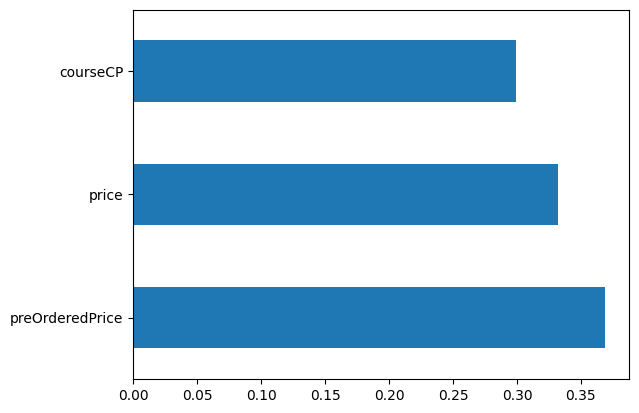

In [260]:
feat_importances = pd.Series(xgboostModel.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [235]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('xgboost')
print('Accuracy: %.3f' % accuracy_score(y_val, predicted))
print('Precision: %.3f' % precision_score(y_val, predicted))
print('Recall: %.3f' % recall_score(y_val, predicted))
print('F1 Score: %.3f' % f1_score(y_val, predicted))

xgboost
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1 Score: 1.000


In [203]:
from xgboost import XGBRegressor
# 建立 XGBClassifier 模型
xgboost_linearModel = XGBRegressor(n_estimators=100, objective ='reg:linear')
# 使用訓練資料訓練模型
xgboost_linearModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(X_val)

[04:04:16] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [204]:
from sklearn.metrics import mean_squared_error as MSE
print('xgboost regression')
rmse = np.sqrt(MSE(y_val, predicted))
print("val RMSE : % f" %(rmse))

xgboost regression
val RMSE :  0.688247


#### random forest

In [261]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predicted = rf.predict(X_val)

<AxesSubplot: >

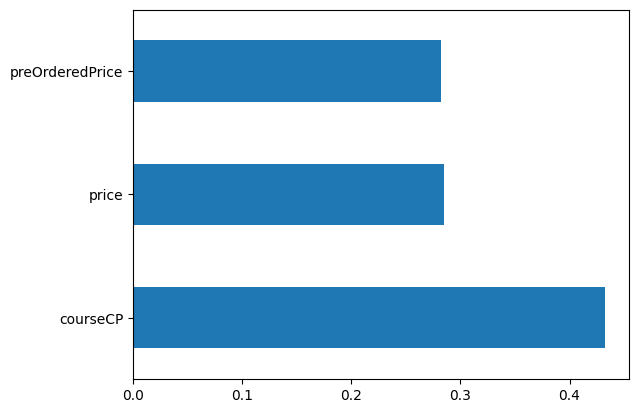

In [262]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [237]:
print('random forest')
print('Accuracy: %.3f' % accuracy_score(y_val, predicted))
print('Precision: %.3f' % precision_score(y_val, predicted))
print('Recall: %.3f' % recall_score(y_val, predicted))
print('F1 Score: %.3f' % f1_score(y_val, predicted))

random forest
Accuracy: 0.921
Precision: 0.875
Recall: 1.000
F1 Score: 0.933


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(x_train, y_train) 
predicted = rf_regressor.predict(X_val) 

In [ ]:
print('random forest regression')
rmse = np.sqrt(MSE(y_val, predicted))
print("val RMSE : % f" %(rmse))

#### svm

In [251]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
predicted = svm.predict(X_val)

In [249]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
    
f_importances(svm.coef_, X_train.columns)

AttributeError: coef_ is only available when using a linear kernel

In [252]:
svm.feature_importances_

AttributeError: 'SVC' object has no attribute 'feature_importances_'

In [239]:
print('svm')
print('Accuracy: %.3f' % accuracy_score(y_val, predicted))
print('Precision: %.3f' % precision_score(y_val, predicted))
print('Recall: %.3f' % recall_score(y_val, predicted))
print('F1 Score: %.3f' % f1_score(y_val, predicted))

svm
Accuracy: 0.711
Precision: 0.812
Recall: 0.619
F1 Score: 0.703


#### Test

In [ ]:
#xgboost
predicted = xgboostModel.predict(X_test)
print('xgboost test')
print('Accuracy: %.3f' % accuracy_score(y_test, predicted))
print('Precision: %.3f' % precision_score(y_test, predicted))
print('Recall: %.3f' % recall_score(y_test, predicted))
print('F1 Score: %.3f' % f1_score(y_test, predicted))

In [ ]:
predicted = xgboost_linearModel.predict(X_test)
print('xgboost regression test')
print('Accuracy: %.3f' % accuracy_score(y_test, predicted))
print('Precision: %.3f' % precision_score(y_test, predicted))
print('Recall: %.3f' % recall_score(y_test, predicted))
print('F1 Score: %.3f' % f1_score(y_test, predicted))

In [ ]:
#random forest
predicted = rf.predict(X_test)
print('random forest test')
print('Accuracy: %.3f' % accuracy_score(y_test, predicted))
print('Precision: %.3f' % precision_score(y_test, predicted))
print('Recall: %.3f' % recall_score(y_test, predicted))
print('F1 Score: %.3f' % f1_score(y_test, predicted))

In [ ]:
predicted = RandomForestRegressor.predict(X_test)
print('random forest regression test')
print('Accuracy: %.3f' % accuracy_score(y_test, predicted))
print('Precision: %.3f' % precision_score(y_test, predicted))
print('Recall: %.3f' % recall_score(y_test, predicted))
print('F1 Score: %.3f' % f1_score(y_test, predicted))

In [ ]:
#svm
predicted = svm.predict(X_test)
print('svm test')
print('Accuracy: %.3f' % accuracy_score(y_test, predicted))
print('Precision: %.3f' % precision_score(y_test, predicted))
print('Recall: %.3f' % recall_score(y_test, predicted))
print('F1 Score: %.3f' % f1_score(y_test, predicted))